# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [49]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox, yeojohnson
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay

In [50]:
#read the data
df =pd.read_csv('recipe_site_traffic_2212.csv')
print(df.head())

   recipe  calories  carbohydrate  ...   category  servings high_traffic
0       1       NaN           NaN  ...       Pork         6         High
1       2     35.48         38.56  ...     Potato         4         High
2       3    914.28         42.68  ...  Breakfast         1          NaN
3       4     97.03         30.56  ...  Beverages         4         High
4       5     27.05          1.85  ...  Beverages         4          NaN

[5 rows x 8 columns]


In [51]:
#Exploratory Data Analysis
print('Shape of the data')
print(df.shape)

print(df.info())

Shape of the data
(947, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB
None


In [52]:
#Check for the duplicates
print(df.duplicated().sum())

0


There are no dupliacte values we can  proceed further.

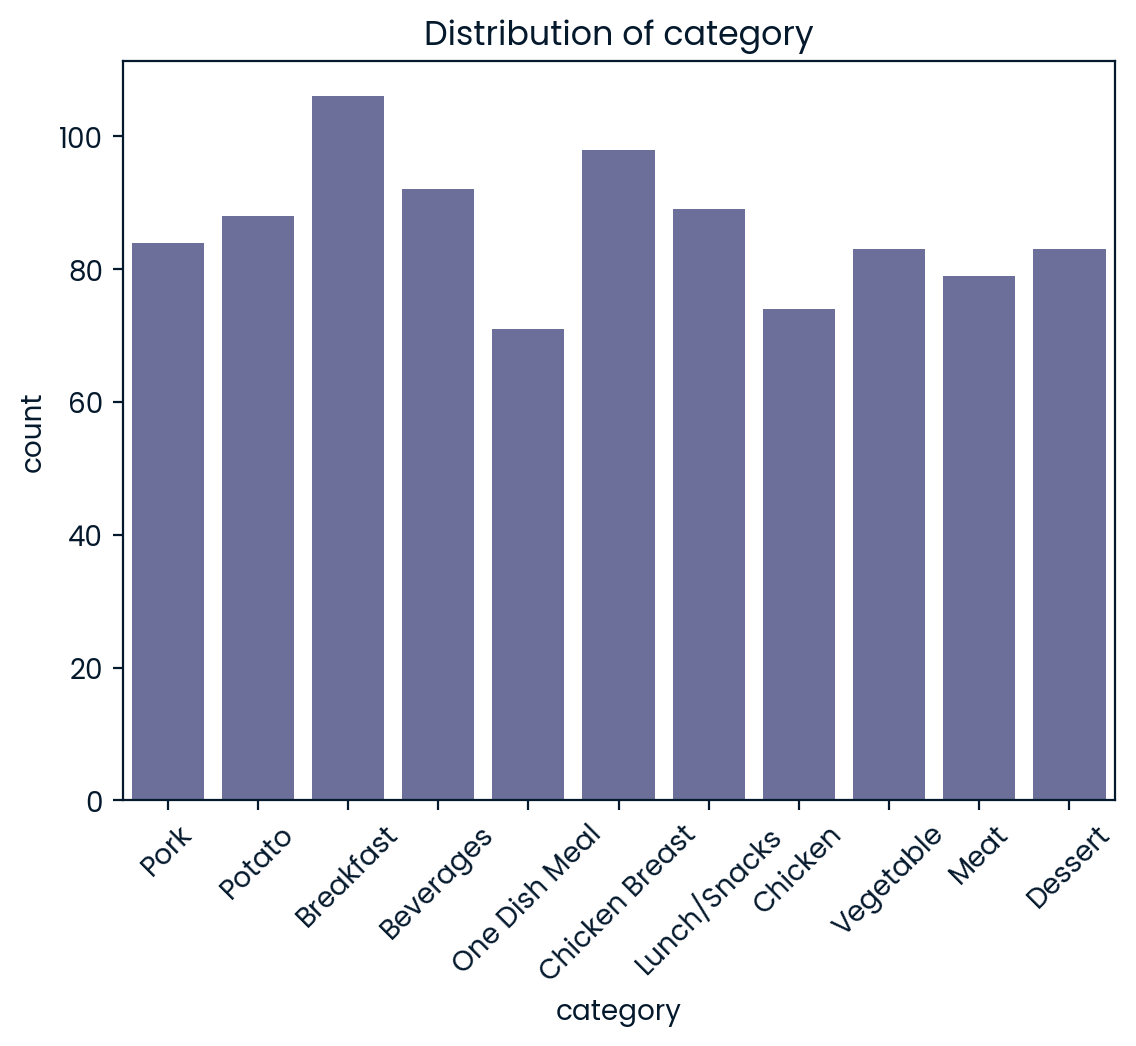

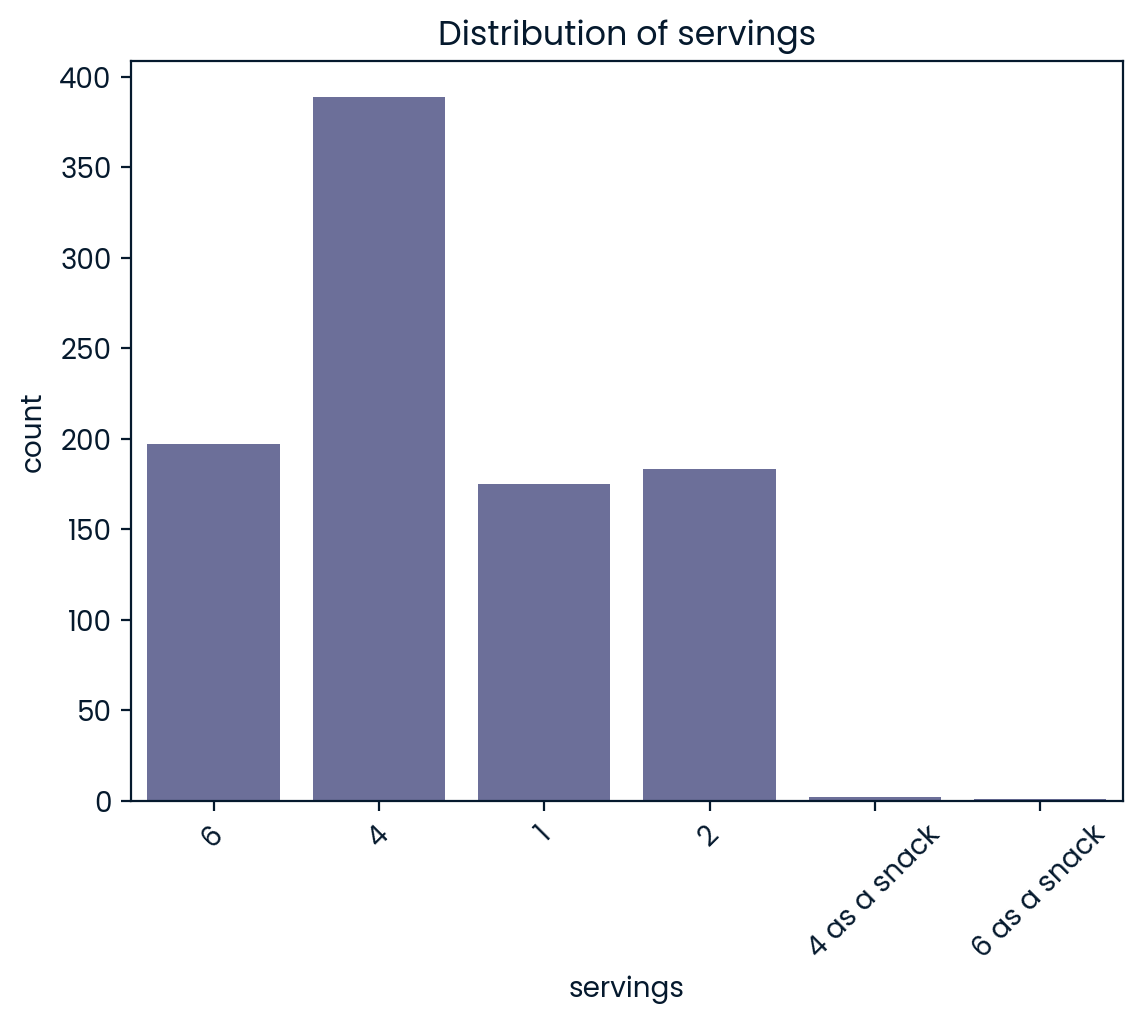

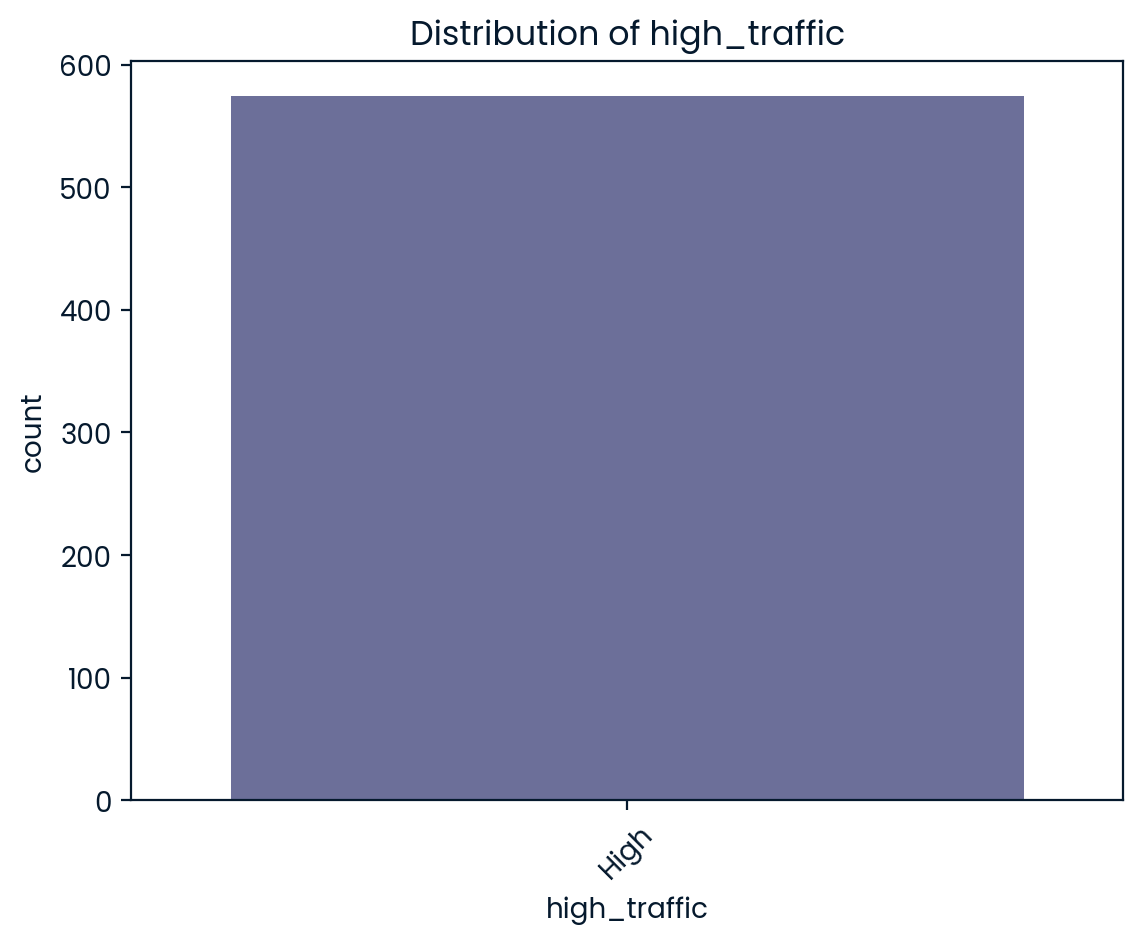

In [53]:
#Check if there is any garbage values
for col in df.select_dtypes(include='object'):
    sns.countplot(x=col,data=df)
    plt.title('Distribution of {}'.format(col))
    plt.xticks(rotation=45)
    plt.show()

The "servings" column contains garbage values and is not of object type. We need to replace these with relevant numeric values.

In [54]:
#replace the string 'as a snack' with relevant numeric value.
df['servings']=df['servings'].str.replace(' as a snack','')

#check for the values in servings
print(df['servings'].value_counts())

4    391
6    198
2    183
1    175
Name: servings, dtype: int64


In [55]:
#convert the servings column to int type
df['servings']=df['servings'].astype('int')

#check if the servings column is converted to int type
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    int64  
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 59.3+ KB
None


We observed that the 'high_traffic' column shows mostly high values, which is due to missing data. We need to convert this column to category type.

In [56]:
#In the above graph we saw all the values are High in high_traffic column. Replace nulls with low
df['high_traffic']=df['high_traffic'].fillna('Low')

#Check the values in high_traffic column
print(df['high_traffic'].value_counts())

#Convert the high_traffic column to category data type
df['high_traffic'] =df['high_traffic'].astype('category')

High    574
Low     373
Name: high_traffic, dtype: int64


In [57]:
#Convert the category Chicken breast to Chicken
df['category']=df['category'].str.replace(' Breast','')

#Check the values in category column
print(df['category'].value_counts())

#Convert the high_traffic column to category data type
df['category'] =df['category'].astype('category')

Chicken          172
Breakfast        106
Beverages         92
Lunch/Snacks      89
Potato            88
Pork              84
Vegetable         83
Dessert           83
Meat              79
One Dish Meal     71
Name: category, dtype: int64


In [58]:
#check the data type of each column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        947 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      947 non-null    category
 6   servings      947 non-null    int64   
 7   high_traffic  947 non-null    category
dtypes: category(2), float64(4), int64(2)
memory usage: 46.9 KB
None


In [59]:
#check for the missing values
print(df.isna().sum())

recipe           0
calories        52
carbohydrate    52
sugar           52
protein         52
category         0
servings         0
high_traffic     0
dtype: int64


In [60]:
#print all the rows that has missing values
df[df.isna().any(axis=1)]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
23,24,NaN,NaN,NaN,NaN,Meat,2,Low
48,49,NaN,NaN,NaN,NaN,Chicken,4,Low
82,83,NaN,NaN,NaN,NaN,Meat,4,High
89,90,NaN,NaN,NaN,NaN,Pork,6,High
116,117,NaN,NaN,NaN,NaN,Chicken,6,High
121,122,NaN,NaN,NaN,NaN,Dessert,2,High
136,137,NaN,NaN,NaN,NaN,One Dish Meal,2,High
149,150,NaN,NaN,NaN,NaN,Potato,2,High
187,188,NaN,NaN,NaN,NaN,Pork,4,High


There are null values in the columns 'calories','carbohydrate','sugar' and 'protein'. Lets check the proportion of each column.

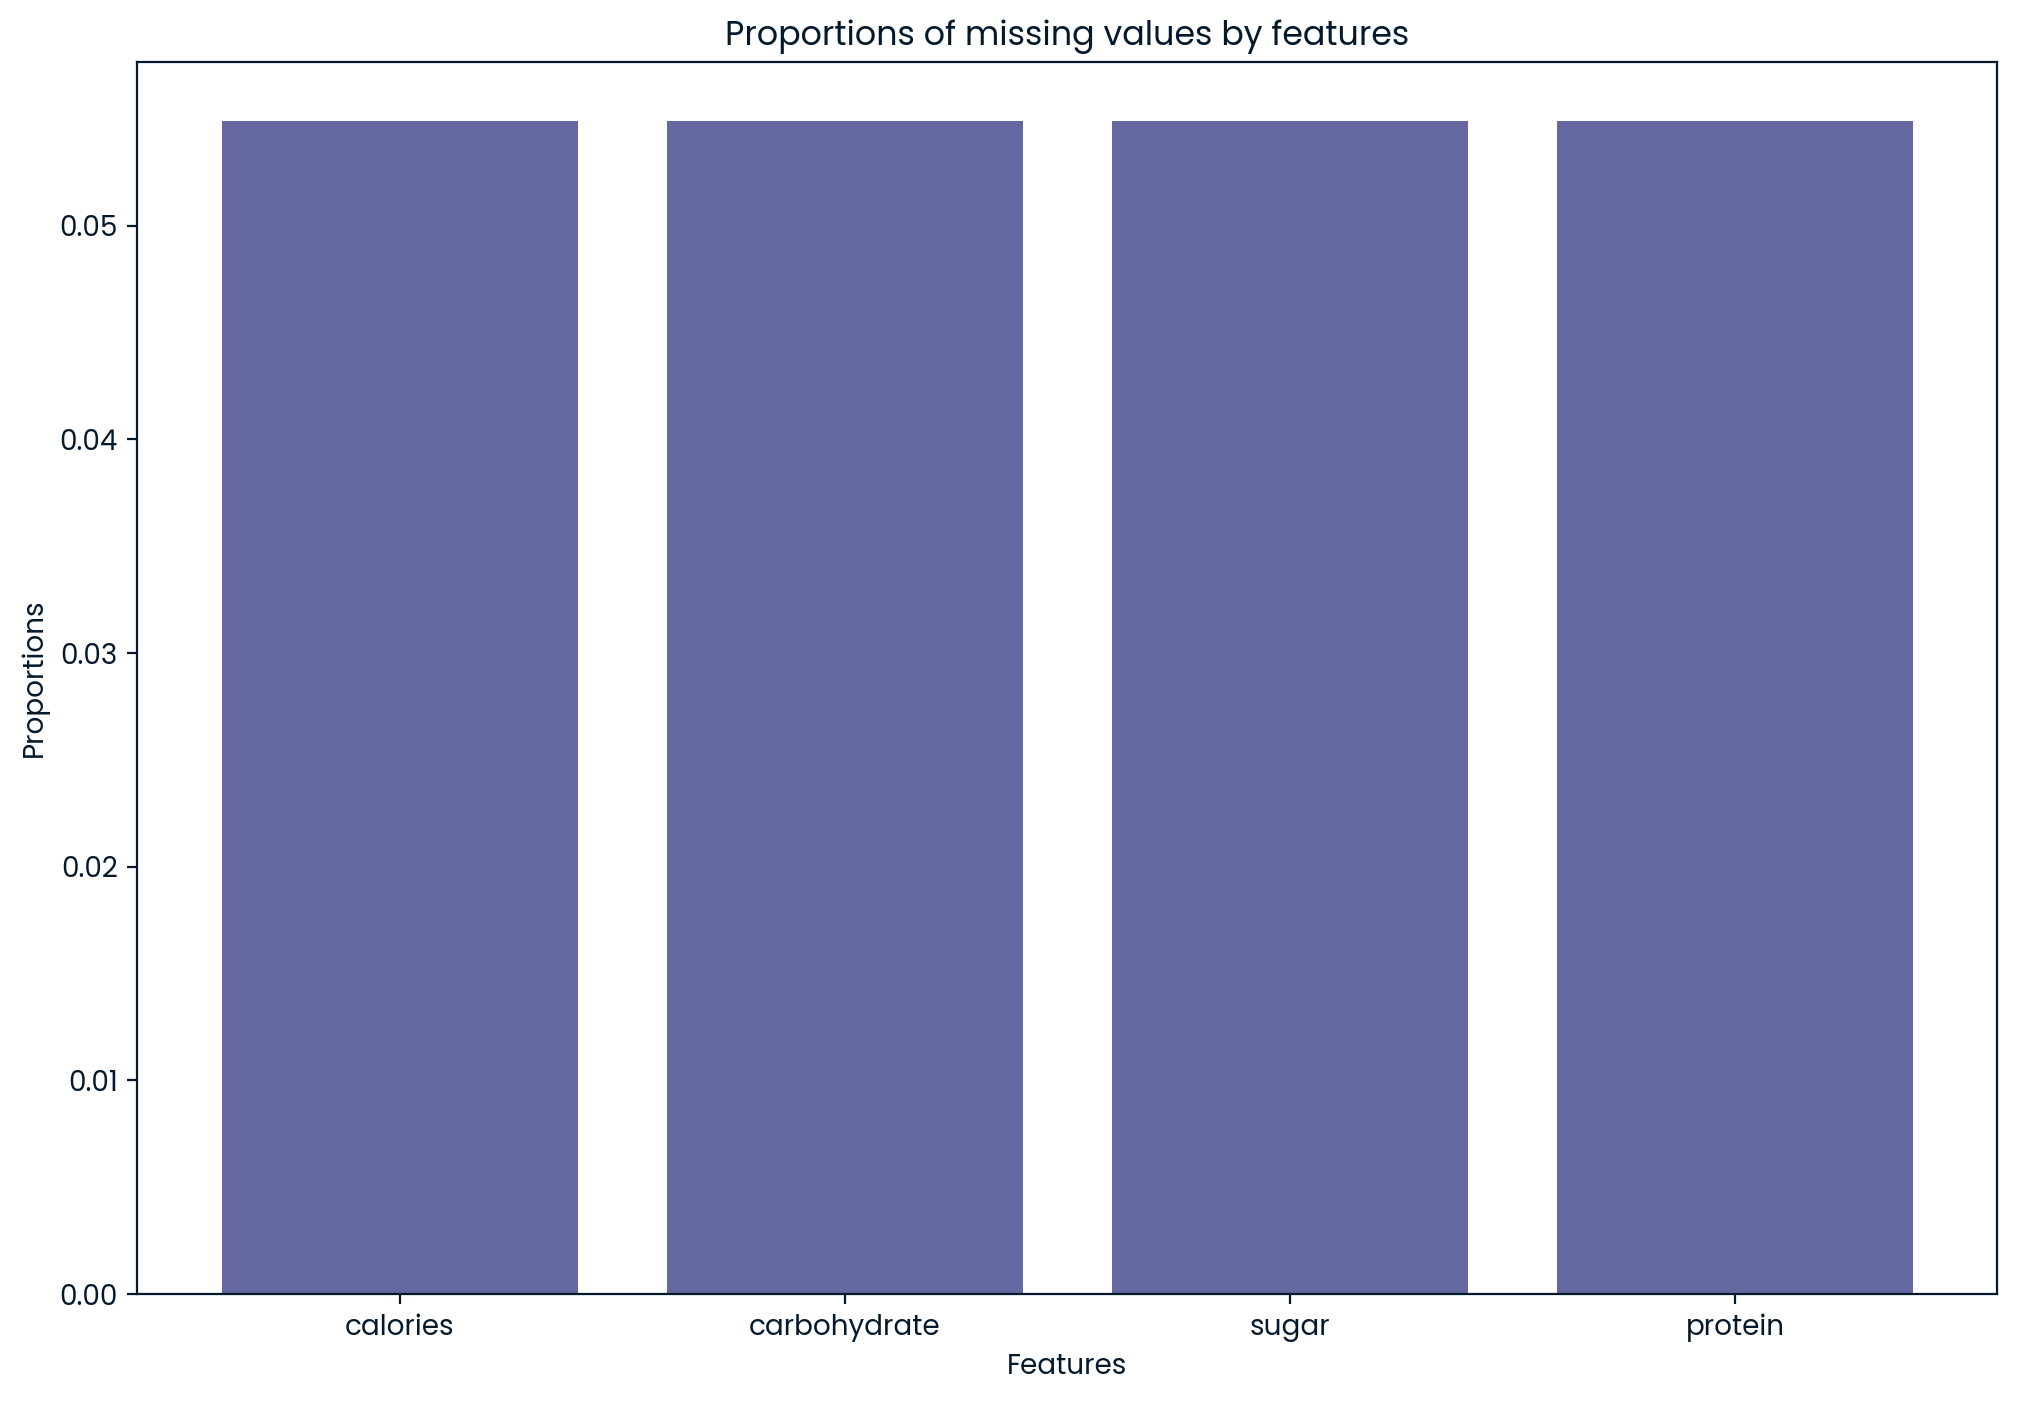

In [61]:
#show the missing rows in each columns distributed according the proportions
missing_data=df.isna().sum()
missing_data=missing_data[missing_data>0]
missing_data.sort_values(inplace=True)
prop_missing = missing_data/len(df)
fig,ax=plt.subplots(figsize=(12,8))
plt.bar(missing_data.index,prop_missing)
ax.set_ylabel('Proportions')
ax.set_xlabel('Features')
ax.set_title('Proportions of missing values by features')
plt.show()

We see all the missing data is almost 5% of the actual dataset we can drop the missing values

In [62]:
#dropping missing values
df=df.dropna().reset_index(drop=True)

In [63]:
#check if there are missing values or the changes are being reflected
print(df.isna().sum())

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64


With the completion of data validation and cleaning, the dataframe is now prepared for exploratory analysis.
Moving forward, we can compute descriptive statistics for each numerical column within the dataframe. 
This process will provide valuable insights into the characteristics of the data.

In [64]:
#generating descriptive statistic for each columns
df.describe()

,recipe,calories,carbohydrate,sugar,protein,servings
count,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000
mean,473.652514,435.939196,35.069676,9.046547,24.149296,3.458101
std,272.763283,453.020997,43.949032,14.679176,36.369739,1.735979
min,2.000000,0.140000,0.030000,0.010000,0.000000,1.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000,2.000000
50%,475.000000,288.550000,21.480000,4.550000,10.800000,4.000000
75%,708.500000,597.650000,44.965000,9.800000,30.200000,4.000000
max,947.000000,3633.160000,530.420000,148.750000,363.360000,6.000000



Analyzing the descriptive statistics, it's evident that there is a notable standard deviation, particularly in columns related to calories and nutritional components.
Additionally, the quantile values indicate the presence of outliers, contributing to skewness in the distribution. 
As a result, we can deduce that the value distribution is non-normal, underscoring that the median is a more representative measure for these columns.


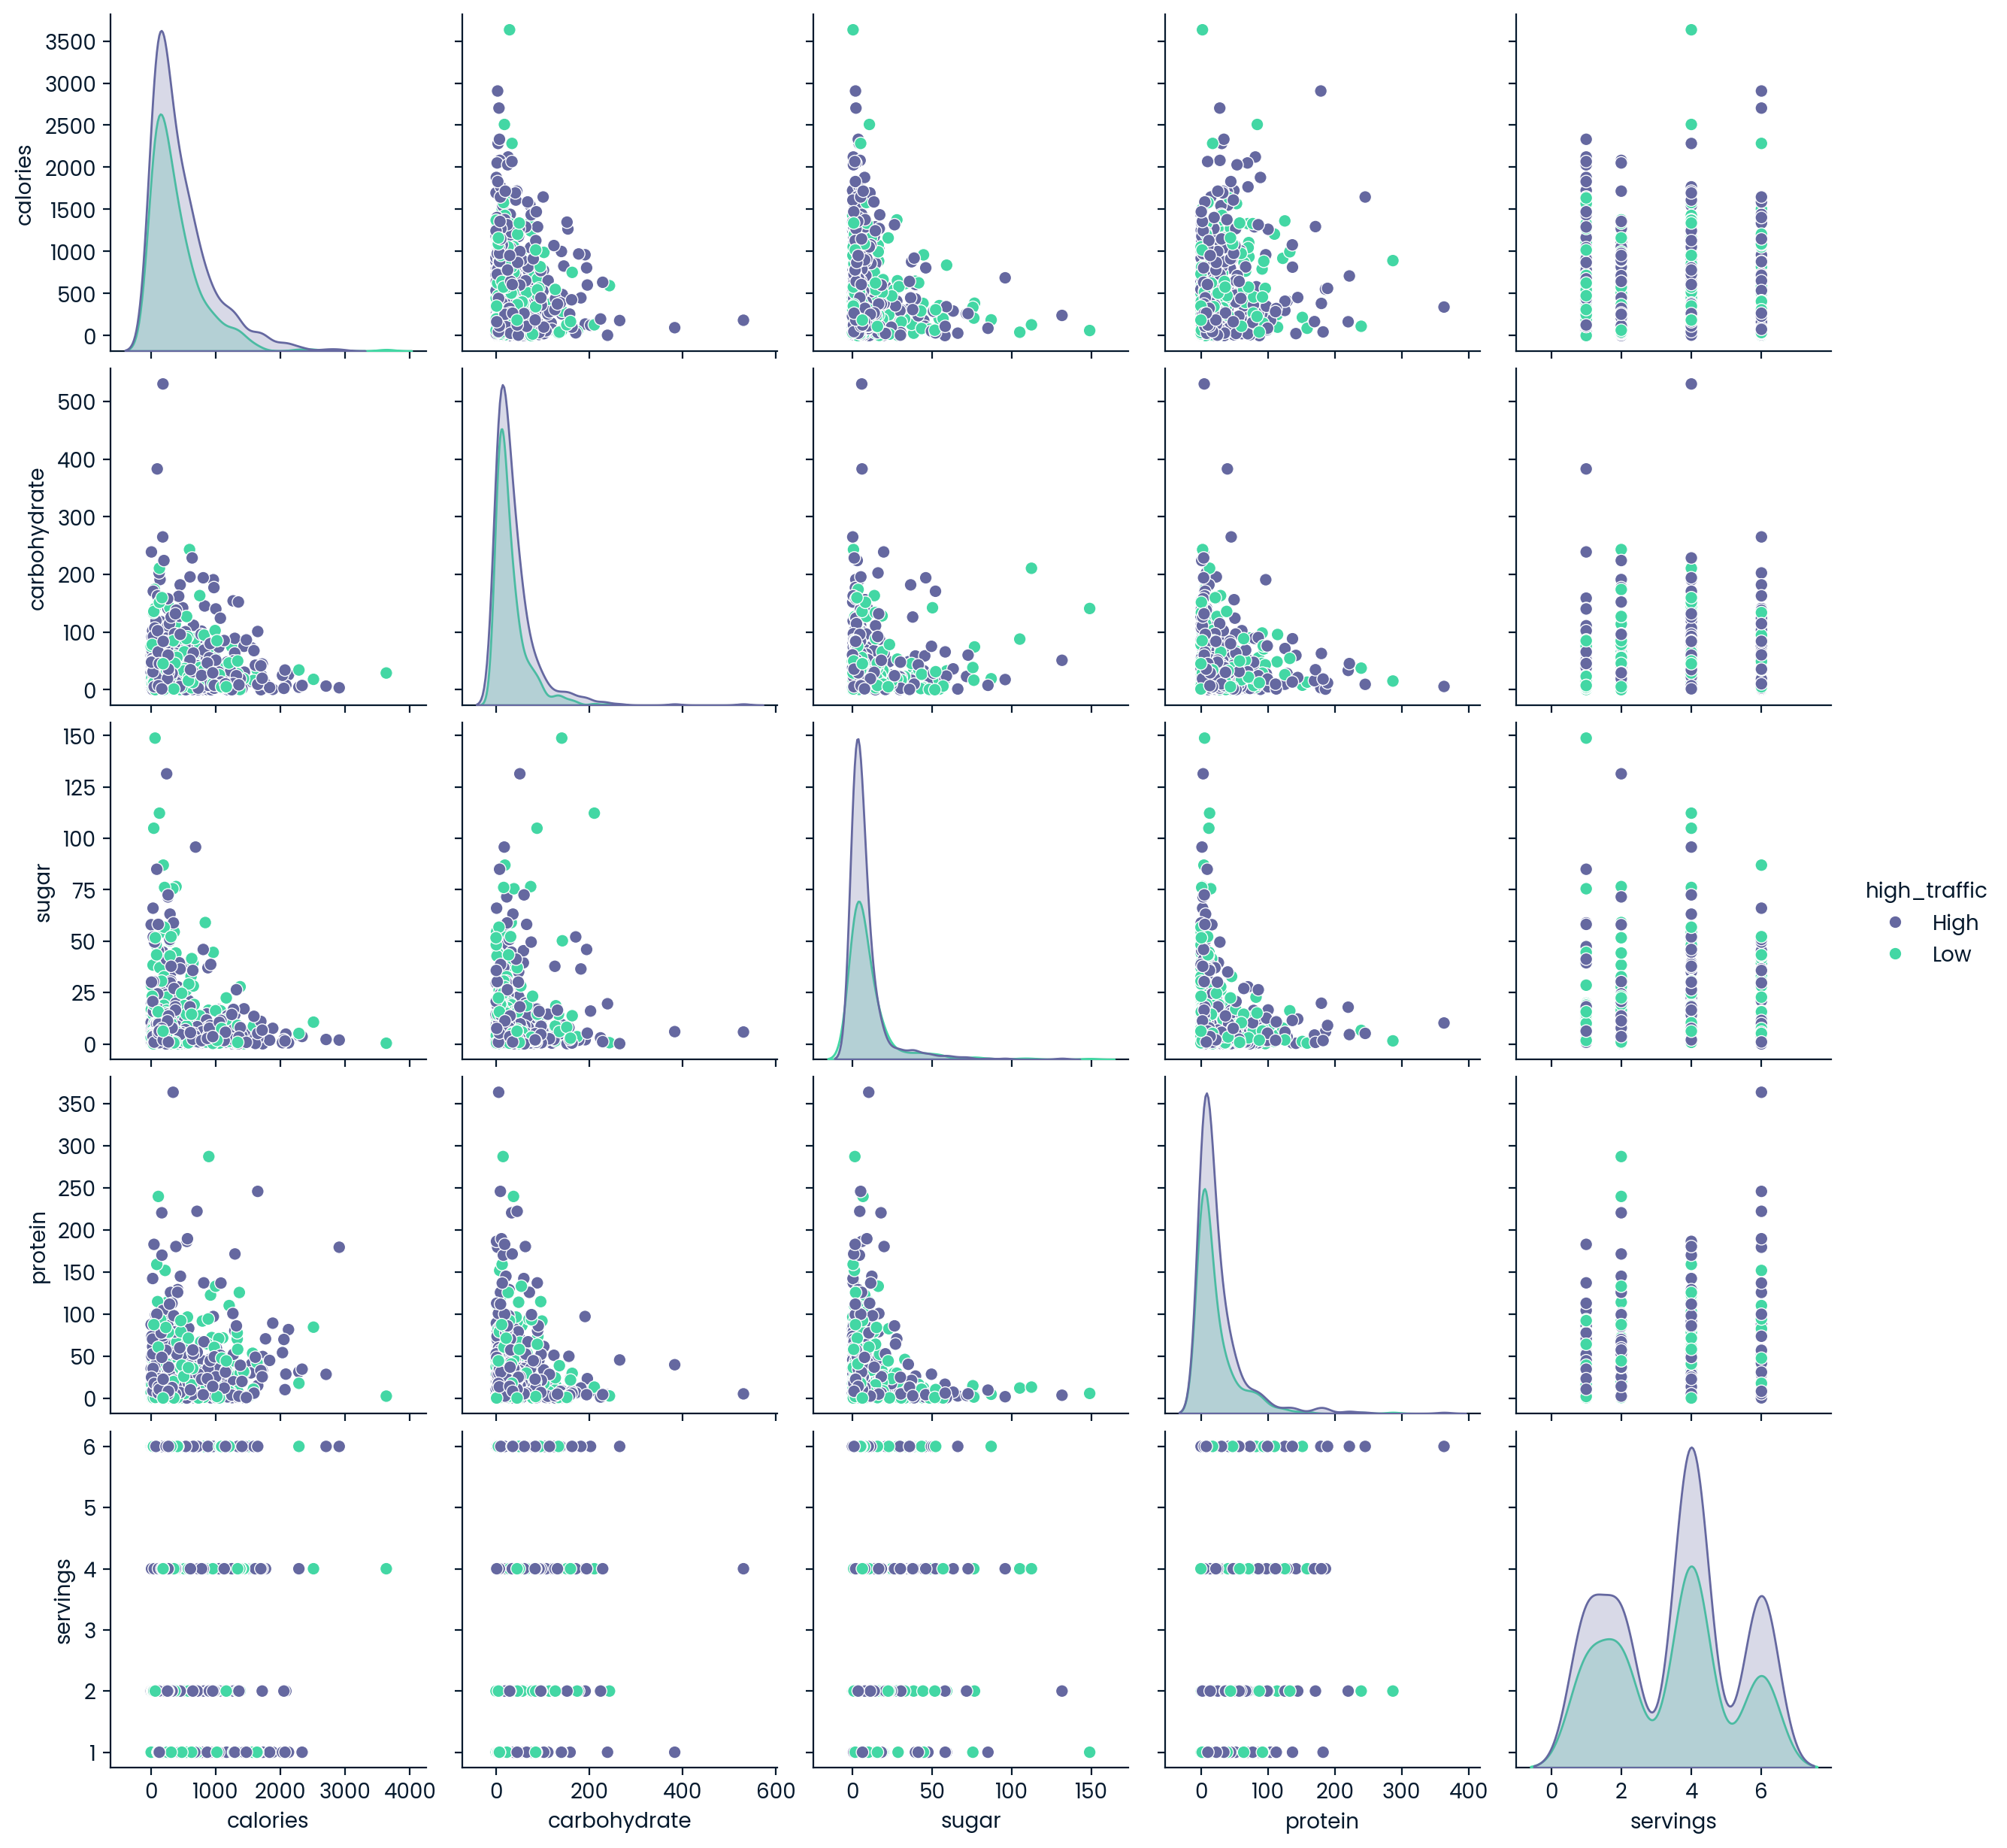

In [65]:
#filtering columns necessary for analysis.
filtered_columns = ['calories', 'carbohydrate', 'sugar', 'protein', 'category', 'servings', 'high_traffic']

sns.pairplot(df[filtered_columns], hue='high_traffic')
plt.show()

Based on the plot, it's apparent that there isn't a significant correlation between these columns.

Next, we'll proceed to generate a histogram to visualize the distribution of calories within the recipes.

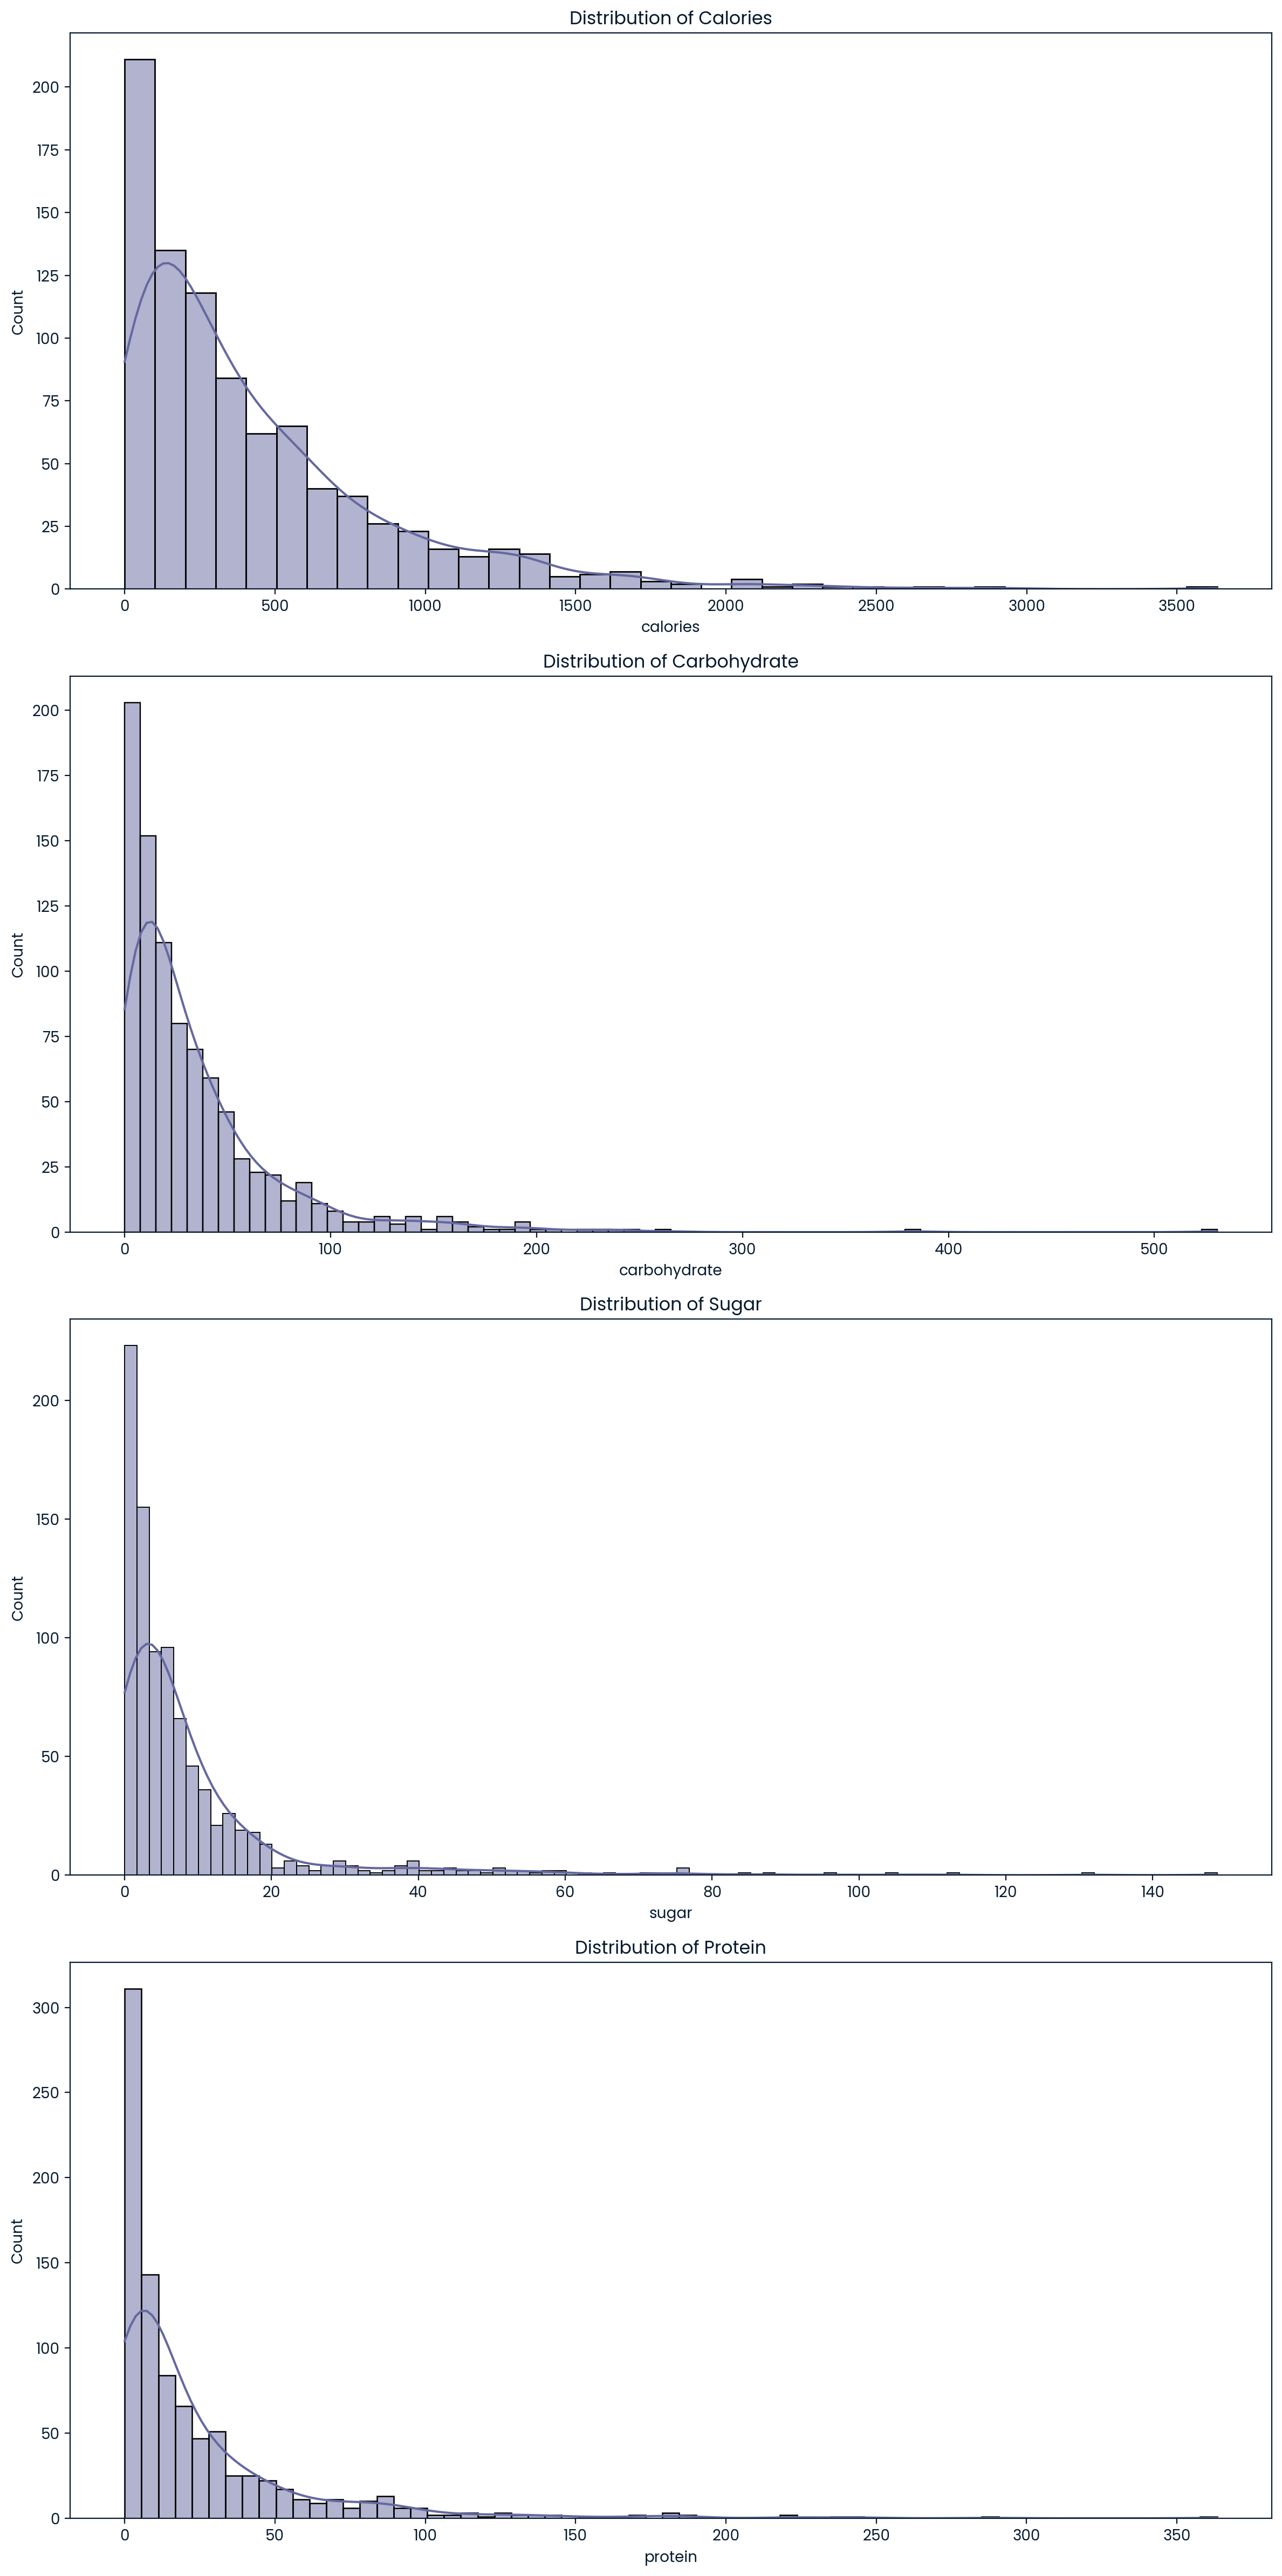

In [66]:
#specifying the numerical columns to plot
numerical_columns =  df.select_dtypes(include='float').columns

#creating subplots with the desired number of rows and columns
num_rows = len(numerical_columns)
fig, axes = plt.subplots(num_rows, 1, figsize=(12, 6 * num_rows))

#iterating over the numerical columns and plot the distributions
for i, column in enumerate(numerical_columns):
    ax = axes[i] if num_rows > 1 else axes
    sns.histplot(data=df, x=column, kde=True, ax=ax)
    ax.set_title(f"Distribution of {column.capitalize()}")

#adjust the spacing between subplots
plt.tight_layout()
plt.show()

The presence of Kernel Density Estimation (KDE) in the plots results in a smooth curve that illustrates the underlying data distribution.

Upon observation, it becomes evident that the dataset predominantly consists of lower values concerning the calorie and nutritional components of foods or beverages. The histograms validate our earlier assertion regarding skewness. Indeed, all the numerical columns display a right-skewed distribution.

To further illustrate the distribution, let's proceed to present it using box plots.

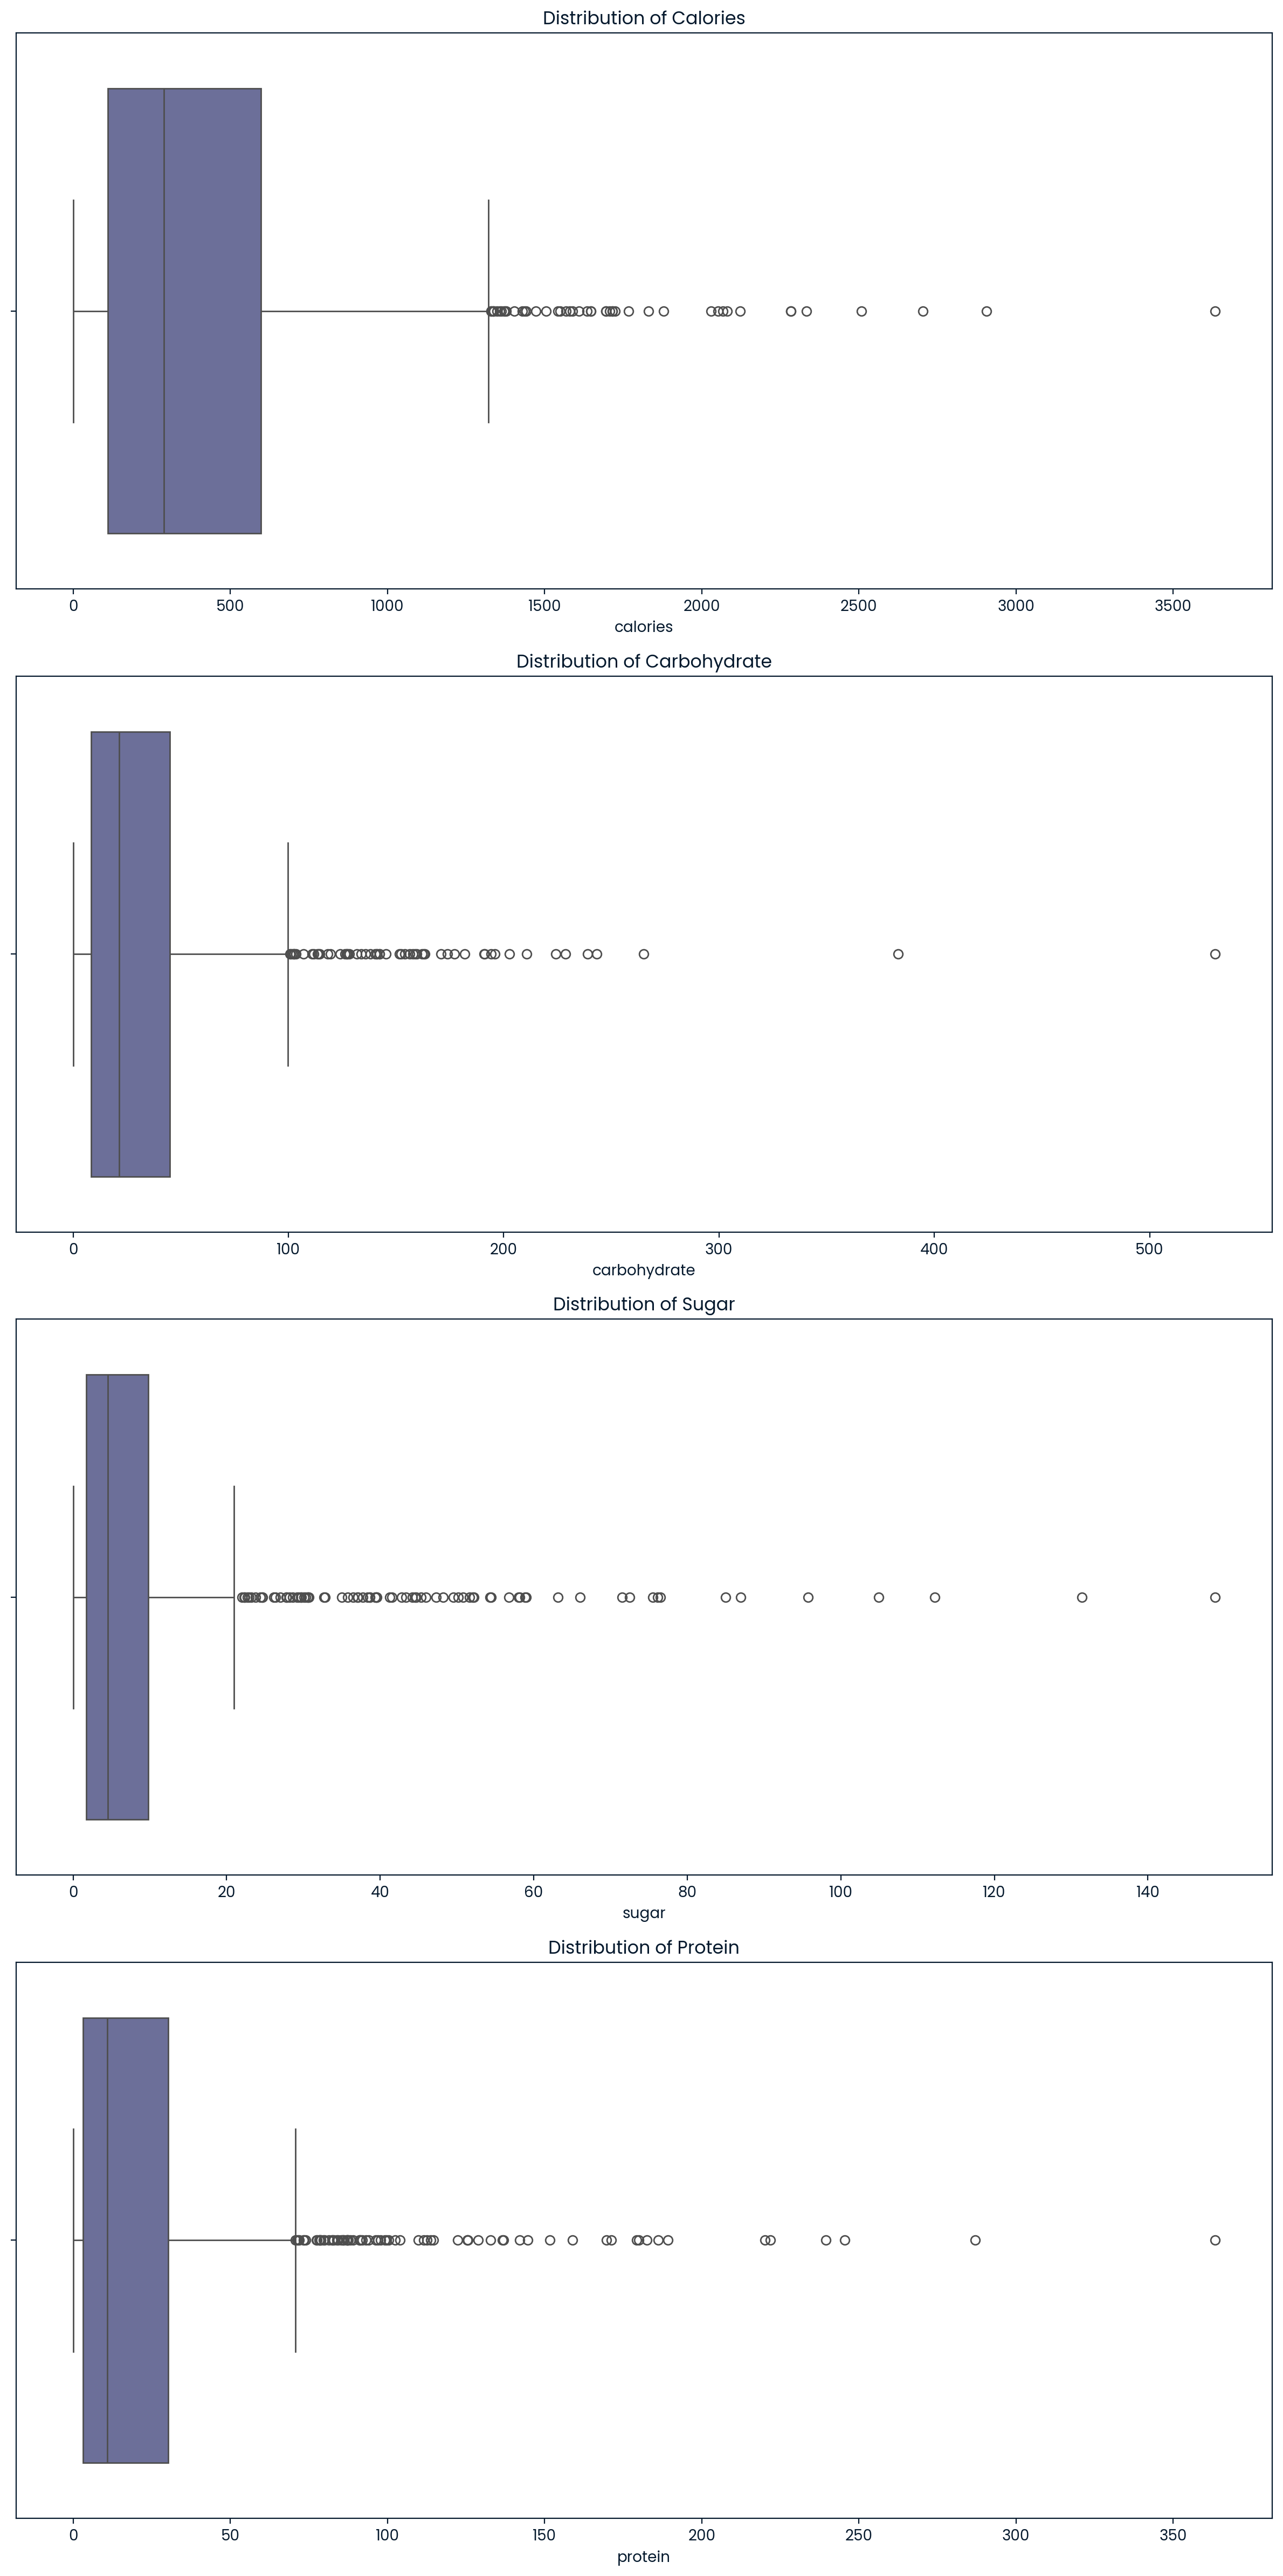

In [67]:
#specifying the numerical columns to plot
numerical_columns =  df.select_dtypes(include='float').columns

#creating subplots with the desired number of rows and columns
num_rows = len(numerical_columns)
fig, axes = plt.subplots(num_rows, 1, figsize=(12, 6 * num_rows))

#iterating over the numerical columns and plot the distributions
for i, column in enumerate(numerical_columns):
    ax = axes[i] if num_rows > 1 else axes
    sns.boxplot(data=df, x=column, ax=ax)
    ax.set_title(f"Distribution of {column.capitalize()}")

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

Once more, the plots above affirm the existence of outliers, the right-skewed nature of these columns, and the importance of employing the median for analysis.

Furthermore, we can delve into the median values of calories and nutritional components based on the category. We can achieve this by grouping the data according to the category and then calculating the median aggregation.

        category  calories  carbohydrate   sugar  protein
0      Beverages   126.455        11.250   8.075    0.410
1      Breakfast   229.380        28.420   4.830   11.685
2        Chicken   379.160        15.490   3.500   33.170
3        Dessert   288.550        38.550  24.650    4.810
4   Lunch/Snacks   369.505        31.985   2.750   12.965
5           Meat   460.870        19.115   3.385   28.530
6  One Dish Meal   419.280        25.430   4.040   28.480
7           Pork   399.260        19.560   5.230   29.820
8         Potato   269.460        32.540   2.640    5.900
9      Vegetable   124.305        13.335   3.700    4.835


<Figure size 640x480 with 0 Axes>

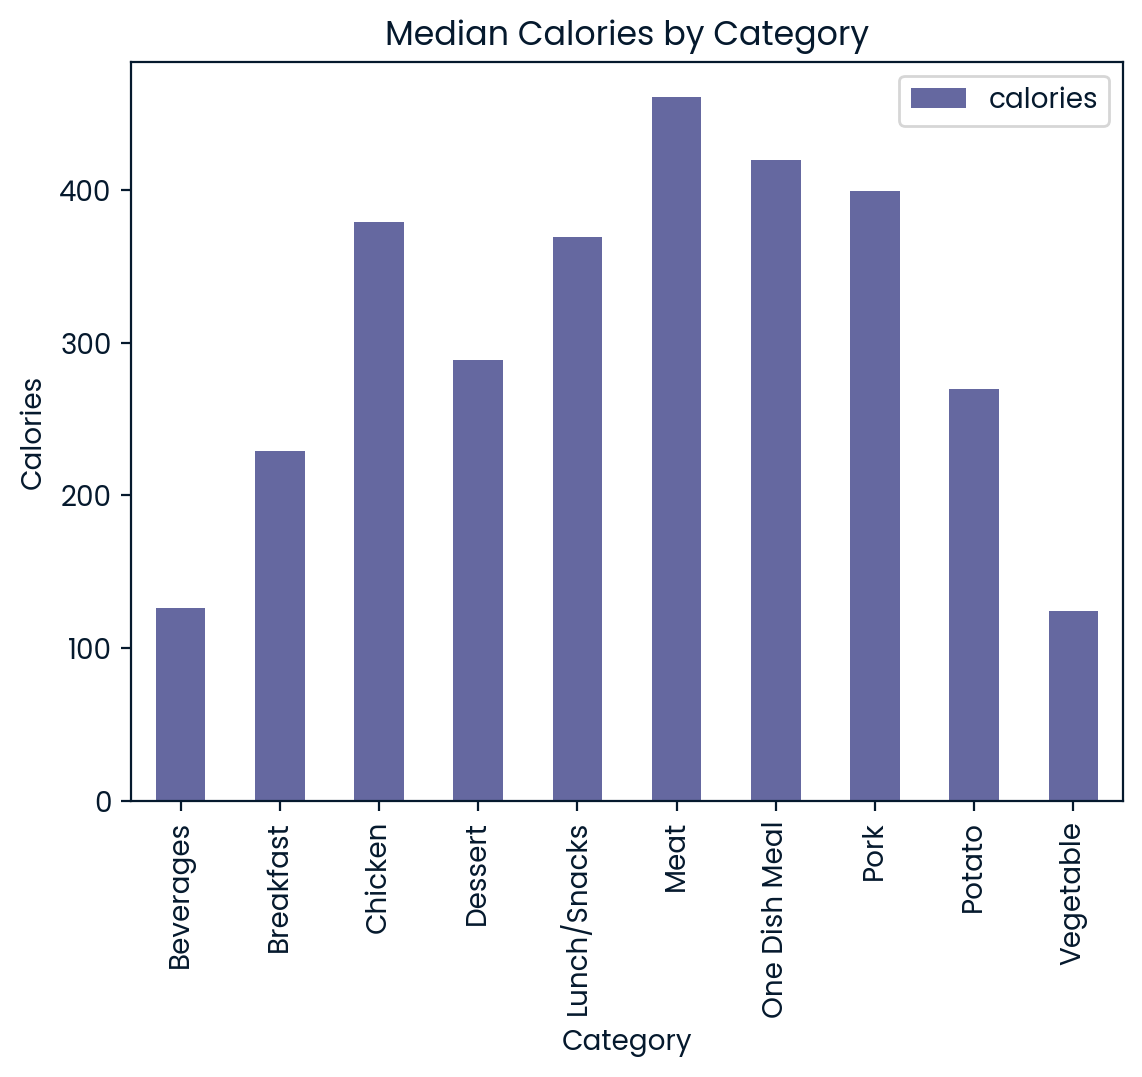

<Figure size 640x480 with 0 Axes>

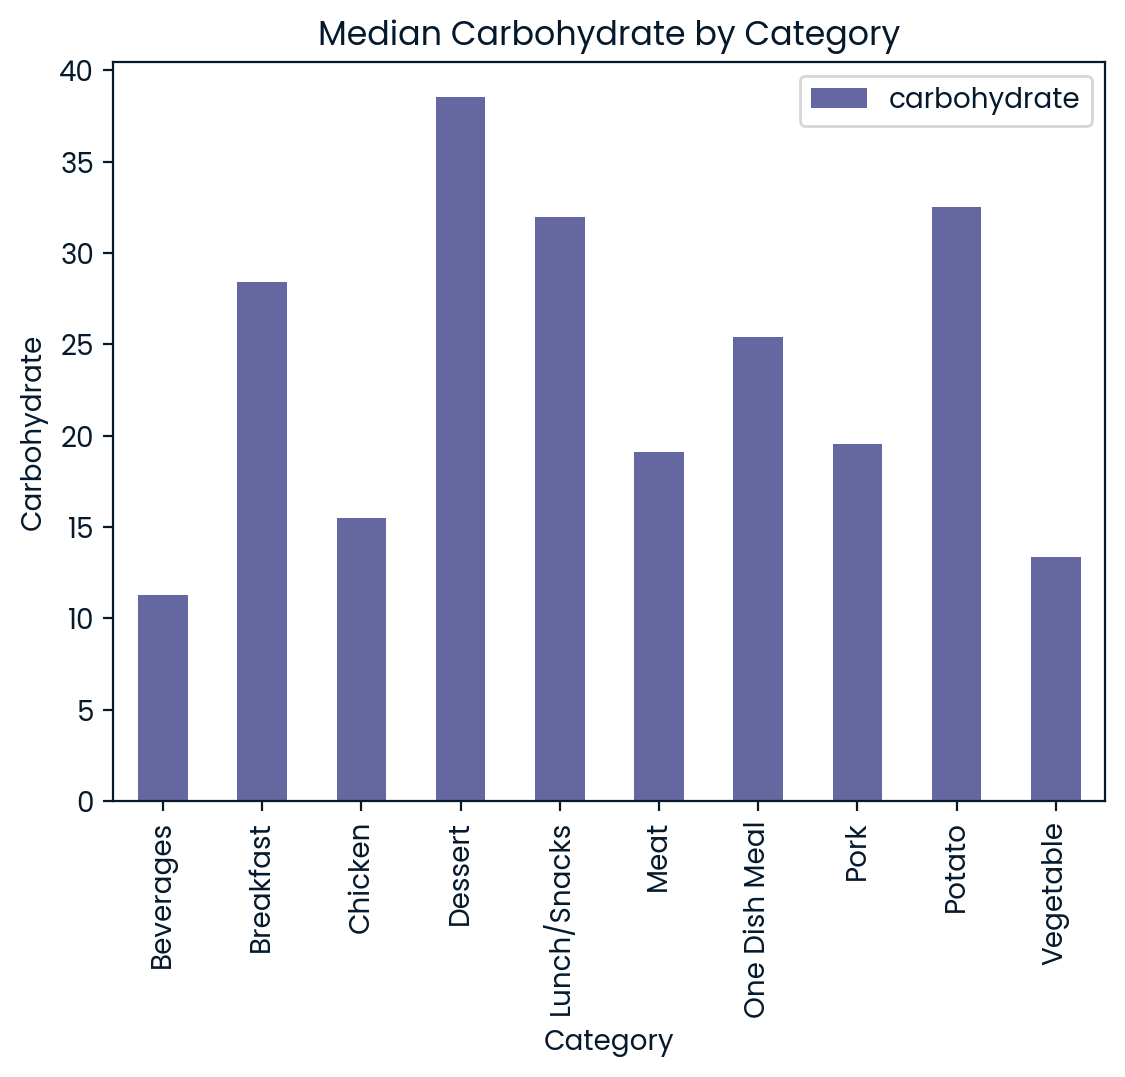

<Figure size 640x480 with 0 Axes>

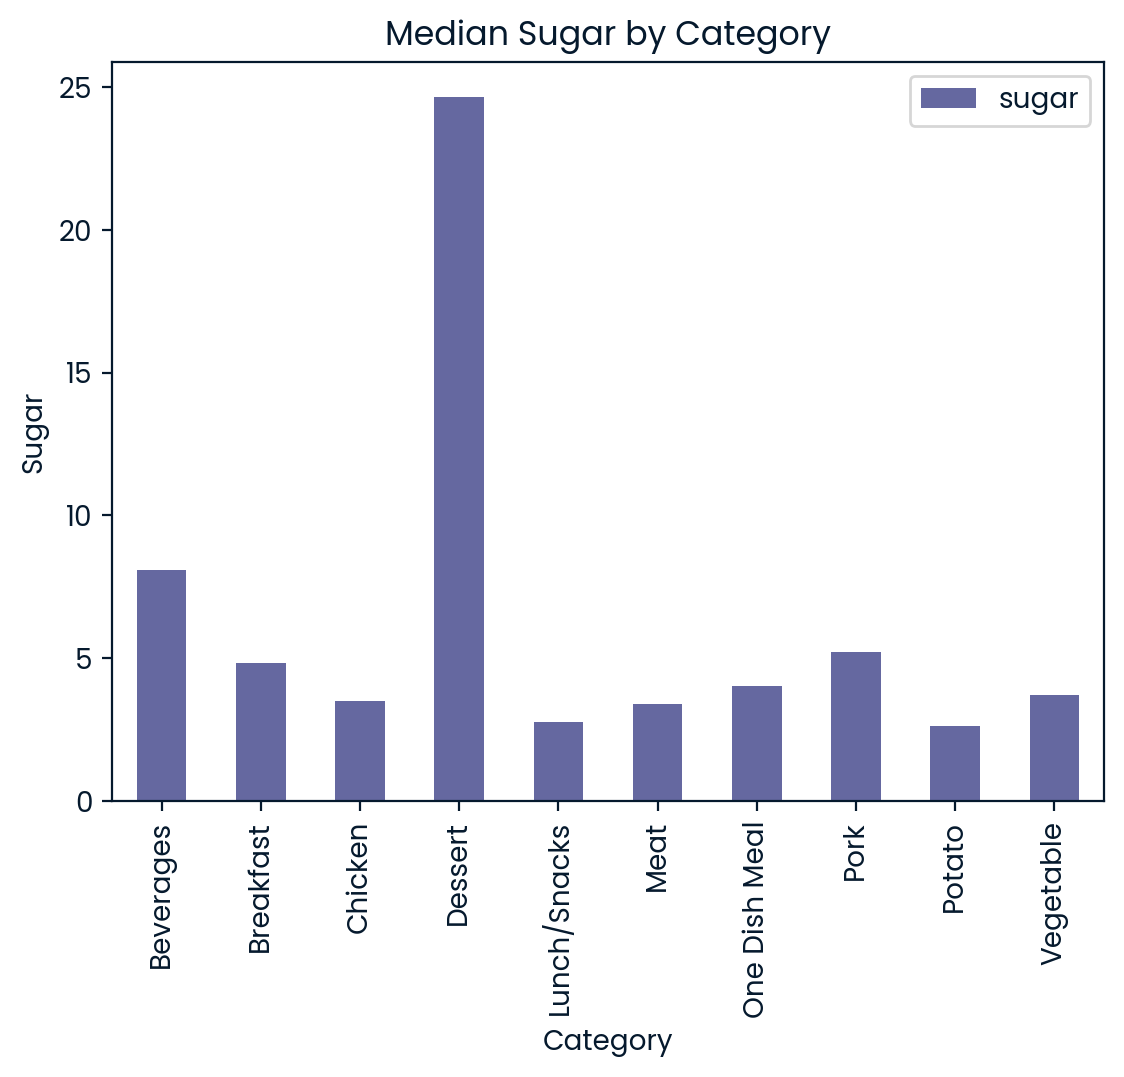

<Figure size 640x480 with 0 Axes>

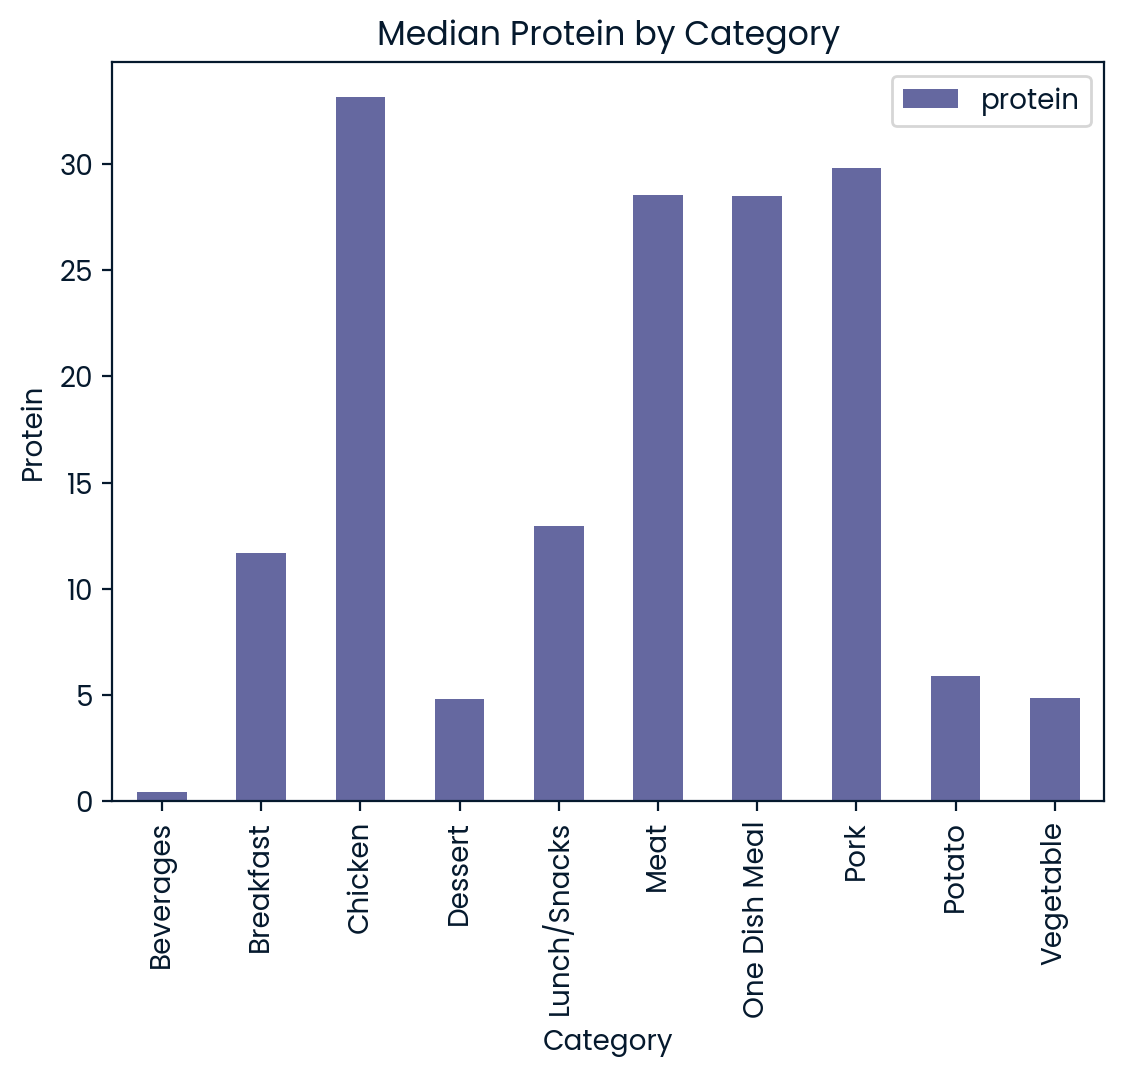

In [68]:
#group by category column and find total number of servings
category_medians = df.groupby("category")[numerical_columns].median().reset_index()
print(category_medians)

for column in numerical_columns:
    #create a bar plot
    plt.figure()
    category_medians.plot(x="category", y=column, kind="bar")
    
    #set x and y axis labels
    plt.xlabel("Category")
    plt.ylabel(f"{column.capitalize()}")
    plt.title(f"Median {column.capitalize()} by Category")

#rotate x axis ticks
plt.xticks(rotation=90)
plt.show()

We observe that the medians for calories and nutritional components aren't symmetrical as anticipated, varying depending on the type of food and beverages.

Moving forward, let's begin by examining the relationship between servings and high traffic status.

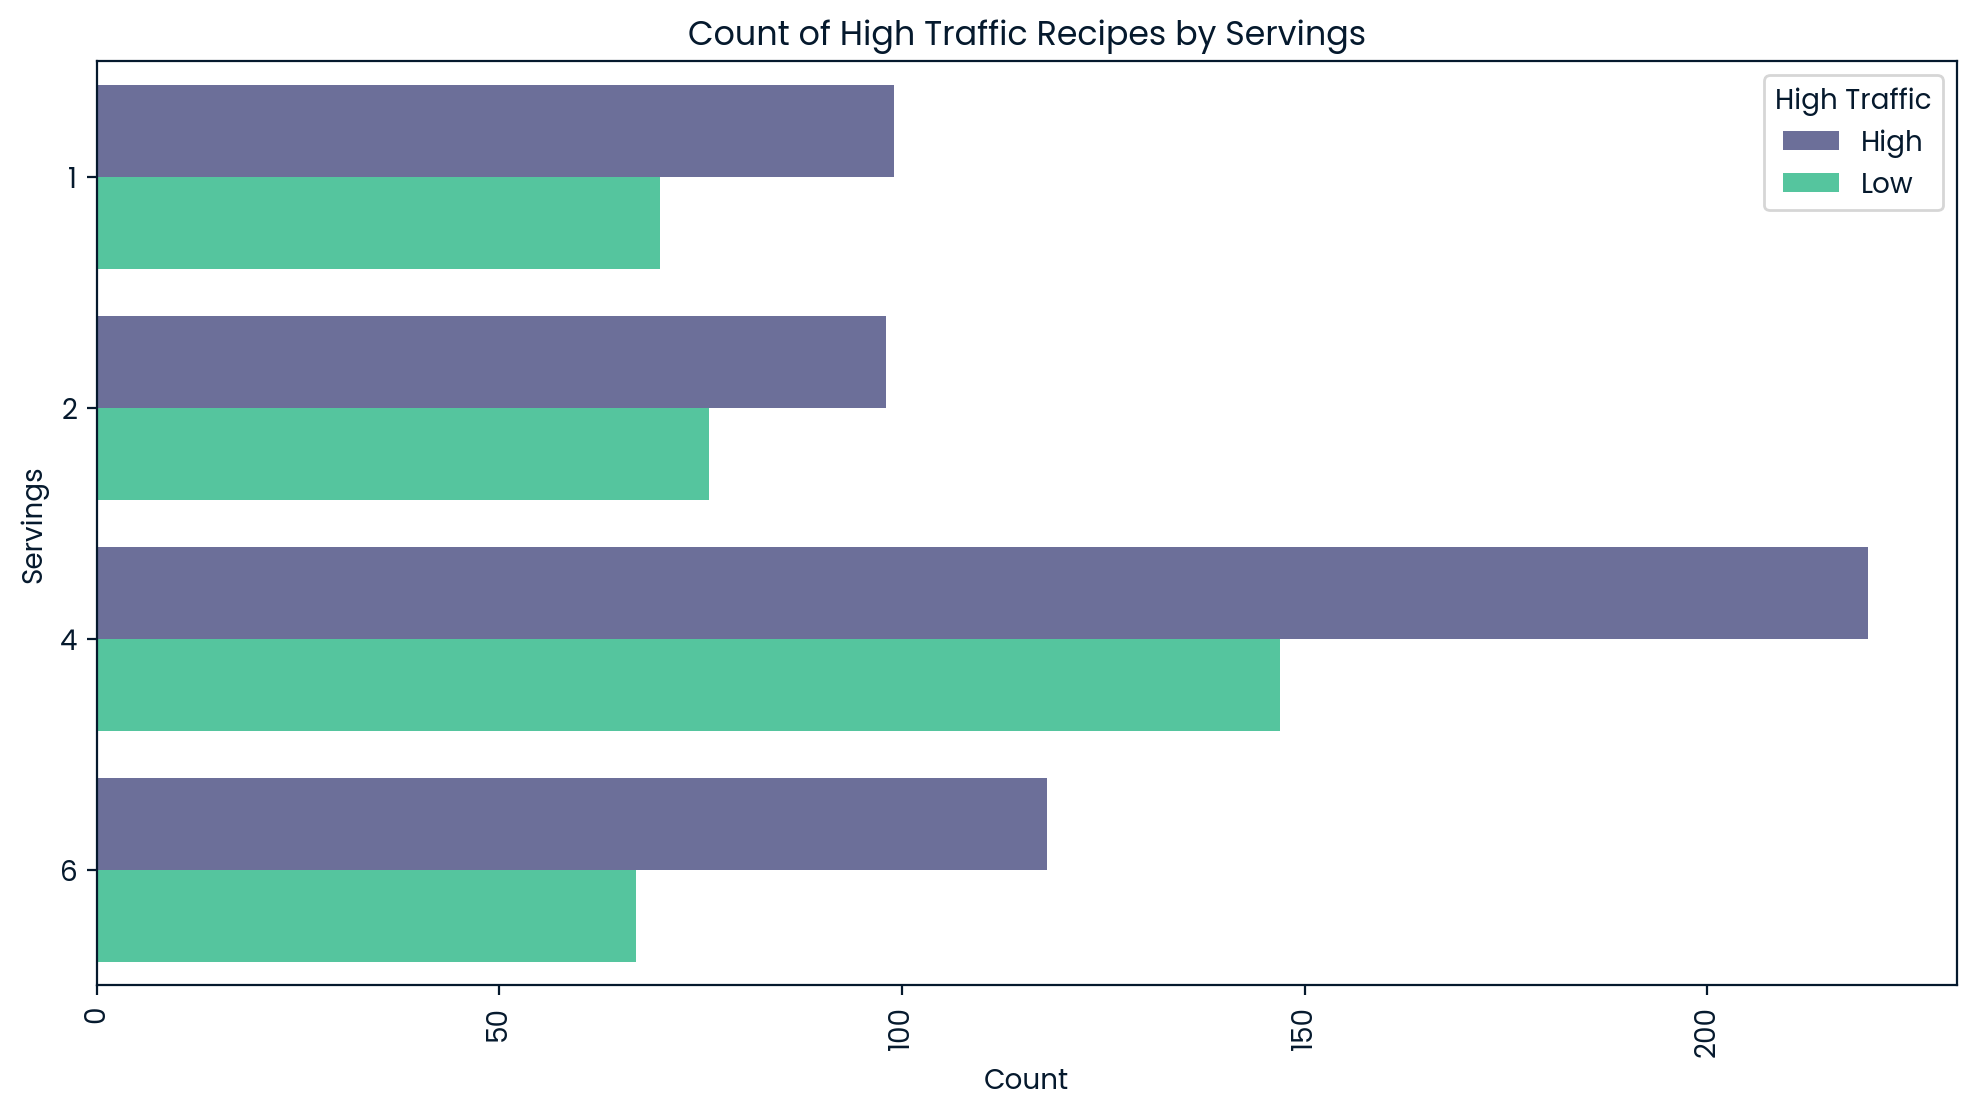

In [69]:
#create a count plot
plt.figure(figsize=(12, 6))
sns.countplot(y="servings", hue="high_traffic", data=df)

#set x and y axis labels
plt.xlabel("Count")
plt.ylabel("Servings")

#set title
plt.title("Count of High Traffic Recipes by Servings")

#set x axis ticks
plt.xticks(rotation=90)

#set legend title
plt.legend(title="High Traffic")
plt.show()

In [70]:
#group by high_trafic to show how total number of survings is distributed
high_traffic_servings = pd.pivot_table(df, index=["servings"], columns=["high_traffic"], values="recipe", aggfunc='count')
high_traffic_servings_normalized = high_traffic_servings.div(high_traffic_servings.sum(axis=1), axis=0)

print(high_traffic_servings_normalized)

high_traffic      High       Low
servings                        
1             0.585799  0.414201
2             0.563218  0.436782
4             0.599455  0.400545
6             0.637838  0.362162


Both the plot and the normalized values illustrate that recipes with 6 servings exhibit a higher rate of high traffic.

Next, we'll proceed to examine the relationship between categories and high traffic status.

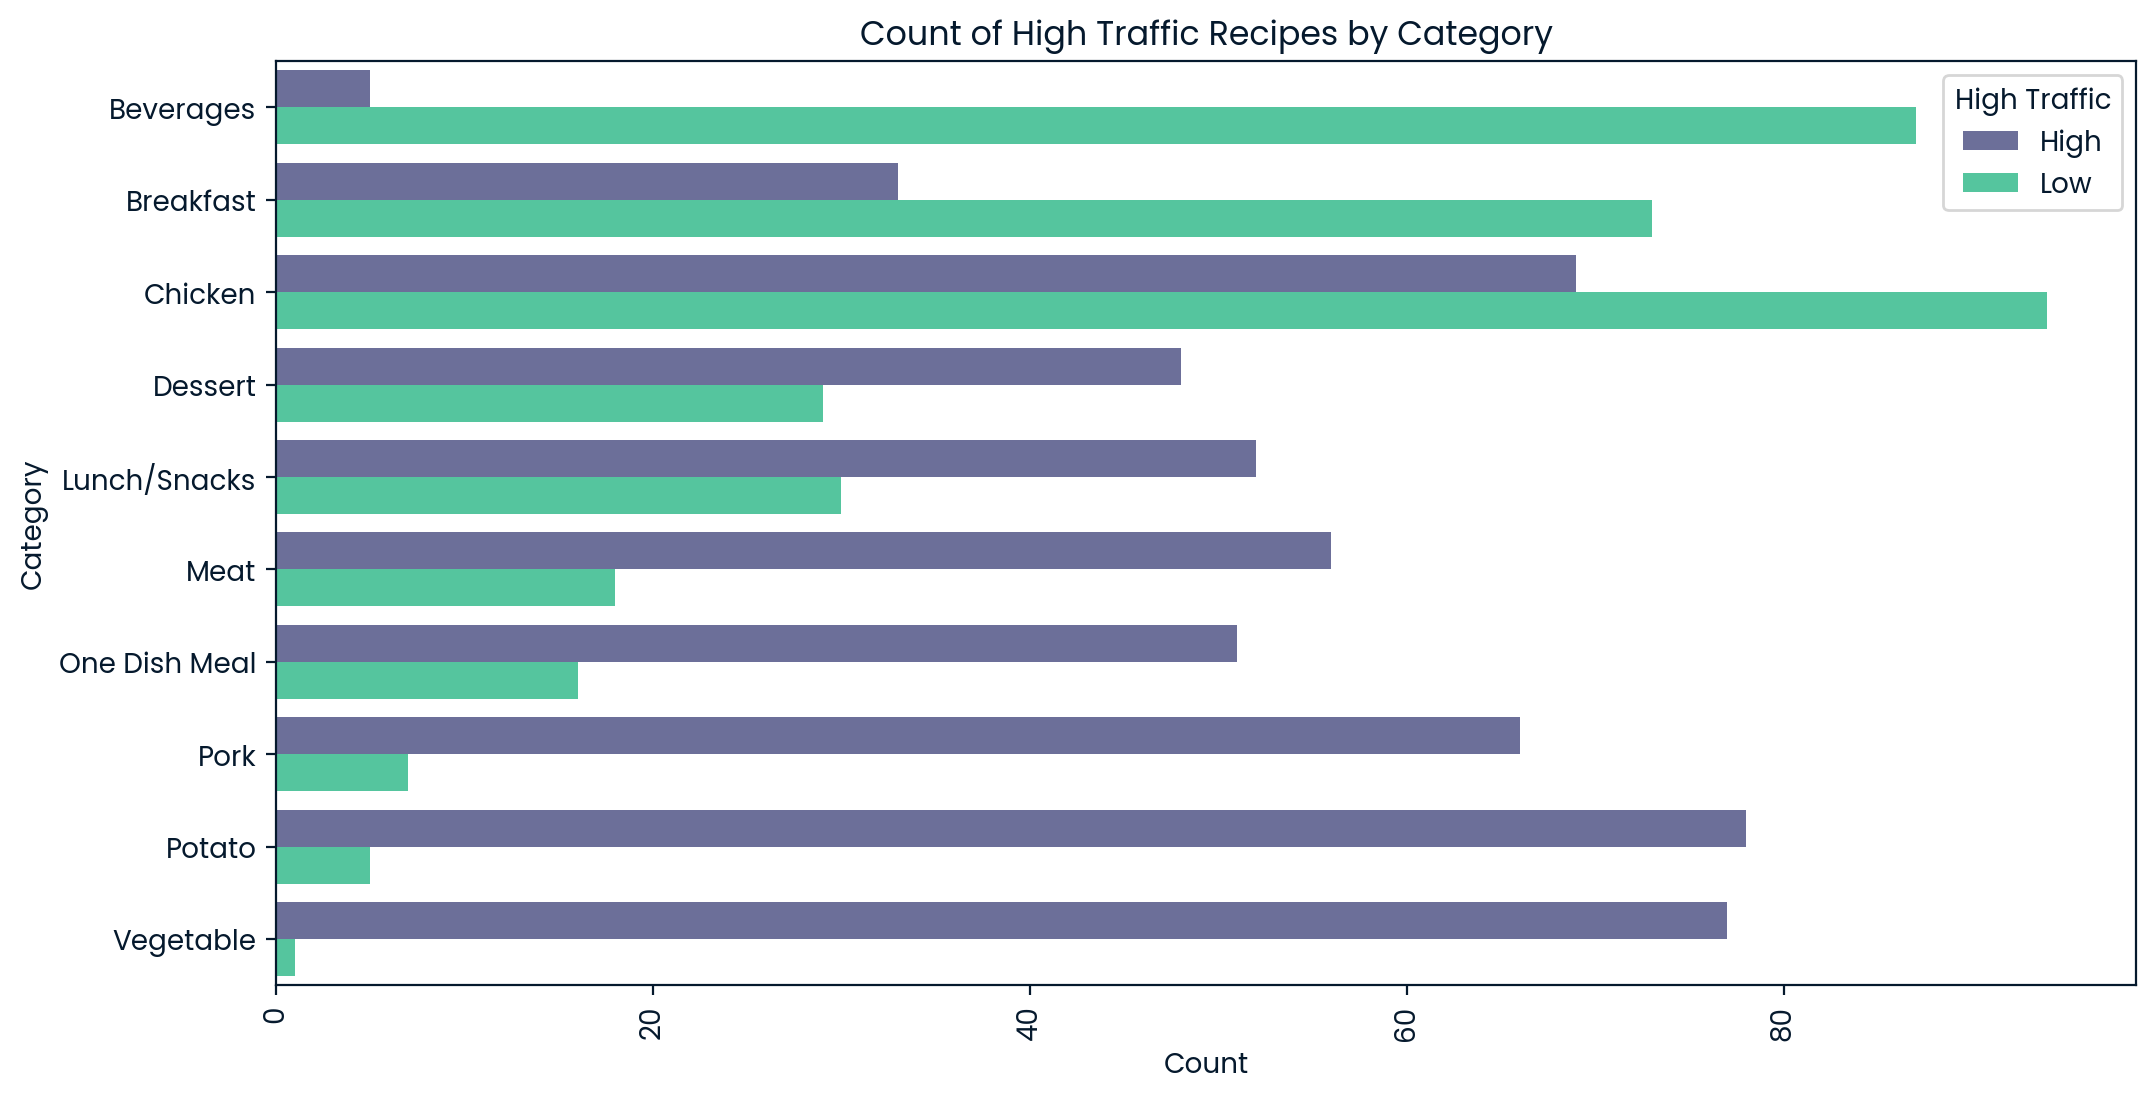

In [71]:
plt.figure(figsize=(12, 6))

sns.countplot(y="category", hue="high_traffic", data=df)

#set x and y axis labels
plt.xlabel("Count")
plt.ylabel("Category")

#set title
plt.title("Count of High Traffic Recipes by Category")

#set x axis ticks
plt.xticks(rotation=90)

#set legend title
plt.legend(title="High Traffic")
plt.show()

In [72]:
	#create pivot table for aggregation
high_traffic_category = df.pivot_table(index="category", columns="high_traffic", values="servings", aggfunc="sum")
normalized_table = high_traffic_category.div(high_traffic_category.sum(axis=1), axis=0)

#show the result
print(normalized_table)

high_traffic       High       Low
category                         
Beverages      0.060127  0.939873
Breakfast      0.314706  0.685294
Chicken        0.418944  0.581056
Dessert        0.627737  0.372263
Lunch/Snacks   0.614035  0.385965
Meat           0.729730  0.270270
One Dish Meal  0.801932  0.198068
Pork           0.912548  0.087452
Potato         0.958861  0.041139
Vegetable      0.986014  0.013986


Consequently, we can deduce that showcasing recipes in certain categories leads to increased traffic.
The top three categories in terms of high traffic are "Vegetable," "Potato," and "Pork." On the other hand, the "Beverages" category appears to have the lowest traffic impact.

Addressing this problem involves leveraging binary classification algorithms from the realm of supervised machine learning.
We have the option to select an appropriate classification model to predict the high traffic status. 
Viable choices include Logistic Regression, Decision Tree, Random Forest, or Support Vector Machines. 
For our baseline model, we'll opt for Logistic Regression, and the others will be considered for comparison.

Before proceeding with Logistic Regression, let's tackle the issue of outliers within our dataset. 
To achieve this, we'll compute the Interquartile Range (IQR) for each column and subsequently determine the upper and lower boundaries to manage the outliers more effectively.

In [73]:
#function to calculate upper and lower boundaries of columns
def calculate_outlier_limits(data, factor=1.5):
    # Find 25% and 75% percentiles
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    #calculate IQR
    iqr = q3 - q1
    
    #calculate lower and upper boundaries
    lower_limit = q1 - (factor * iqr)
    upper_limit = q3 + (factor * iqr)
    return lower_limit, upper_limit
#select numerical columns
numerical_columns = ['calories', 'carbohydrate', 'sugar', 'protein']

#calculate outlier limits for each numerical column
outlier_limits = {}
for column in numerical_columns:
    lower_limit, upper_limit = calculate_outlier_limits(df[column])
    outlier_limits[column] = (lower_limit, upper_limit)

#check the calculated outlier limits for each column
for column, limits in outlier_limits.items():
    print(f"Column: {column}")
    print(f"Lower Limit: {limits[0]}")
    print(f"Upper Limit: {limits[1]}")
    print("--------------------------------")

Column: calories
Lower Limit: -620.3999999999999
Upper Limit: 1328.48
--------------------------------
Column: carbohydrate
Lower Limit: -46.510000000000005
Upper Limit: 99.85000000000001
--------------------------------
Column: sugar
Lower Limit: -10.475000000000003
Upper Limit: 21.965000000000003
--------------------------------
Column: protein
Lower Limit: -37.31250000000001
Upper Limit: 70.70750000000001
--------------------------------


As anticipated, there are no concerns with respect to low values; however, certain high values require attention.
Various techniques are available to address this issue. Upon evaluation, it's apparent that outright removal of outliers leads to significant data loss, making this approach less favorable.
Similarly, capping outliers or using winsorization doesn't yield the desired distribution.

Through experimentation with diverse transformation methods including Logarithmic Transformation, Square Root Transformation, Yeo-Johnson Transformation, and Box-Cox Transformation, it has been determined that the Yeo-Johnson Transformation is the most effective approach.

Note that a few columns contain 0 values. While the Box-Cox Transformation could be used after replacing these 0 values with a very small value (e.g., 0.00001), such a replacement might introduce bias. Therefore, the Yeo-Johnson method has been preferred in this case.

In [74]:
#specifying the numerical columns to plot
numerical_columns =  df.select_dtypes(include='float').columns

#filter the dataset based on the outlier limits
transformed_data = df.copy()
for column, limits in outlier_limits.items():
    lower_limit, upper_limit = limits
    
    
    transformed_data[column] = yeojohnson(transformed_data[column])[0]                  # Yeo-Johnson Transformation

# Check the filtered dataset
transformed_data.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,2,5.742713,4.409023,0.481476,0.653469,Potato,4,High
1,3,17.437755,4.550612,1.224094,1.360783,Breakfast,1,Low
2,4,8.416476,4.091120,2.587147,0.019804,Beverages,4,High
3,5,5.133412,1.101661,0.553884,0.425754,Beverages,4,Low
4,6,16.024490,1.607528,0.883720,4.049462,One Dish Meal,2,High


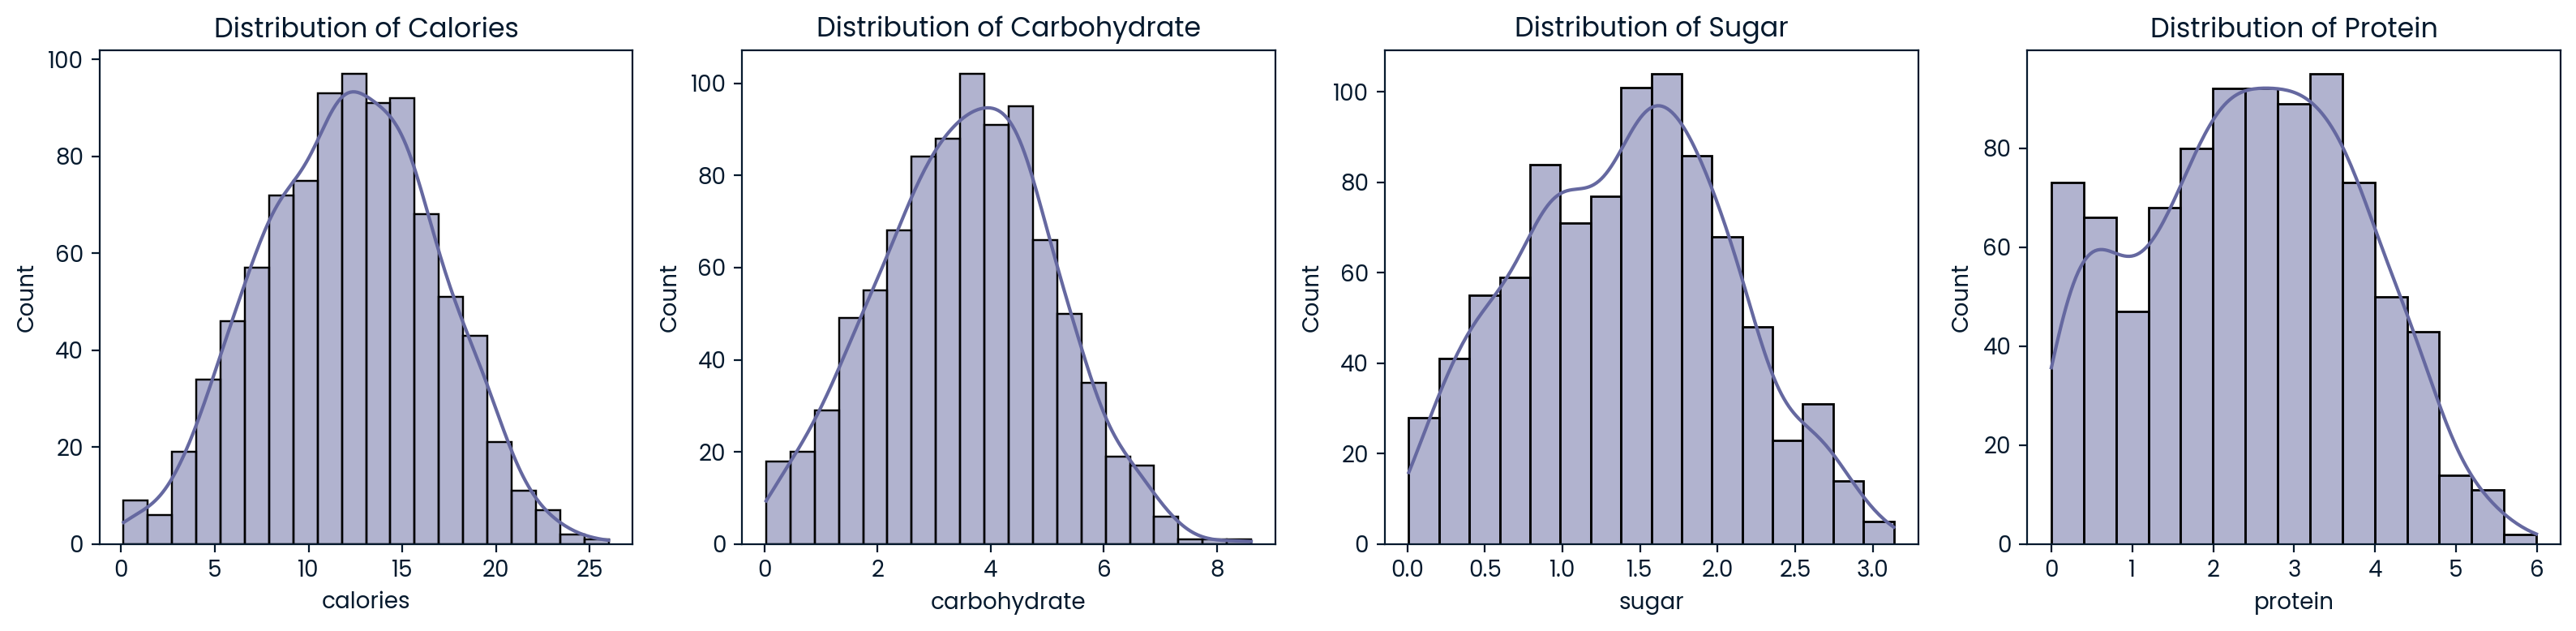

In [75]:
plt.figure(figsize=(16, 4))

#iterating over each column and create a bar plot
for i, column in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i+1)
    sns.histplot(data=transformed_data, x=column, kde=True)
    plt.title(f"Distribution of {column.capitalize()}")

#adjust the spacing between subplots if needed
plt.tight_layout()
plt.show()

In [76]:
#performing one-hot encoding on the category column
encoded_categories = pd.get_dummies(df["category"])

#concatenate the encoded categories with the original dataframe
recipe_site_traffic_encoded = pd.concat([transformed_data, encoded_categories], axis=1)

#drop the original category column
recipe_site_traffic_encoded = recipe_site_traffic_encoded.drop("category", axis=1)
recipe_site_traffic_encoded.head()

,recipe,calories,carbohydrate,sugar,protein,servings,high_traffic,Beverages,Breakfast,Chicken,Dessert,Lunch/Snacks,Meat,One Dish Meal,Pork,Potato,Vegetable
0,2,5.742713,4.409023,0.481476,0.653469,4,High,0,0,0,0,0,0,0,0,1,0
1,3,17.437755,4.550612,1.224094,1.360783,1,Low,0,1,0,0,0,0,0,0,0,0
2,4,8.416476,4.091120,2.587147,0.019804,4,High,1,0,0,0,0,0,0,0,0,0
3,5,5.133412,1.101661,0.553884,0.425754,4,Low,1,0,0,0,0,0,0,0,0,0
4,6,16.024490,1.607528,0.883720,4.049462,2,High,0,0,0,0,0,0,1,0,0,0


Certainly, we'll proceed as follows:

Split the data into features (X) and the target variable (y), where the target variable is the "high_traffic" column.
Further divide the data into training and testing sets using the train_test_split function from the scikit-learn library.
Develop both the baseline model and comparison models.
Fit the chosen model on the training data and employ it to predict the outcomes on the testing data. Additionally, we can utilize the predict method on the trained model to assess the potential of overfitting.
With this in mind, let's proceed to create the baseline and comparison machine learning models.

In [77]:
#split the data into features (X) and target variable (y)
X = recipe_site_traffic_encoded.drop("high_traffic", axis=1)
y = recipe_site_traffic_encoded["high_traffic"]

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

preprocessor= StandardScaler()
pipe = {'Logistic Regression':Pipeline([('preprocessor',preprocessor),('classifier',LogisticRegression())]),
           'Random forest Classifier': Pipeline([('preprocessor',preprocessor),('classifier',RandomForestClassifier())]),
           'SVC': Pipeline([('preprocessor',preprocessor),('classifier',SVC())]),
           'Decision Tree Classifier': Pipeline([('preprocessor',preprocessor),('classifier',DecisionTreeClassifier())])}

In [78]:
for clf_name,pipeline in pipe.items():
    cv_scores=cross_val_score(pipeline,X_train,y_train,cv=5,scoring='accuracy')
    print(f'{clf_name}-Mean accuracy: {np.mean(cv_scores):.4f}')
    #print(pipeline.get_params())

Logistic Regression-Mean accuracy: 0.7527
Random forest Classifier-Mean accuracy: 0.7221
SVC-Mean accuracy: 0.7444
Decision Tree Classifier-Mean accuracy: 0.6731


In [79]:
params_grids ={'Logistic Regression': {'classifier__C':np.arange(1,10,1)},
              'Random forest Classifier':{'classifier__n_estimators':np.arange(1,10,1)},
              'SVC':{'classifier__C':np.arange(1,10,1)},
              'Decision Tree Classifier':{'classifier__criterion':['gini','entropy']}}

Logistic Regression Hyperparameters:
{'classifier__C': 1}
Train Accuracy:
0.7527389277389277
Test
Accuracy:0.7654
Report:              precision    recall  f1-score   support

        High       0.81      0.82      0.82       113
         Low       0.69      0.67      0.68        66

    accuracy                           0.77       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.76      0.77      0.76       179



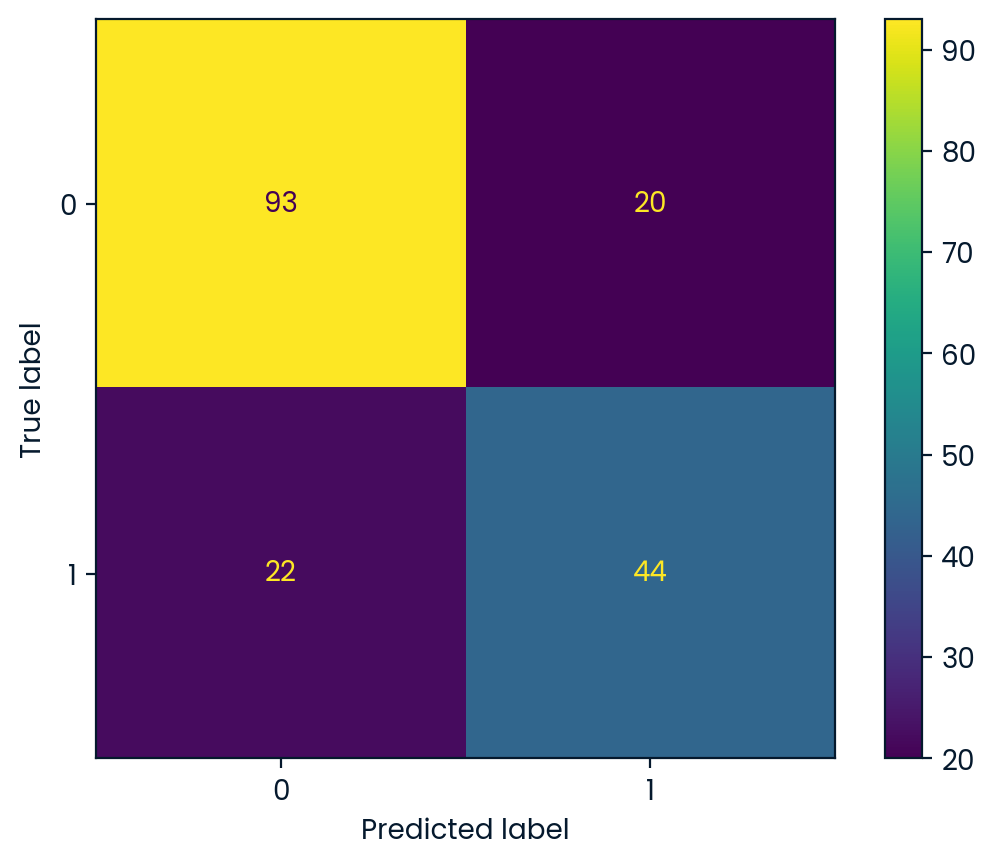

Random forest Classifier Hyperparameters:
{'classifier__n_estimators': 8}
Train Accuracy:
0.7346542346542346
Test
Accuracy:0.7430
Report:              precision    recall  f1-score   support

        High       0.78      0.83      0.80       113
         Low       0.67      0.59      0.63        66

    accuracy                           0.74       179
   macro avg       0.72      0.71      0.72       179
weighted avg       0.74      0.74      0.74       179



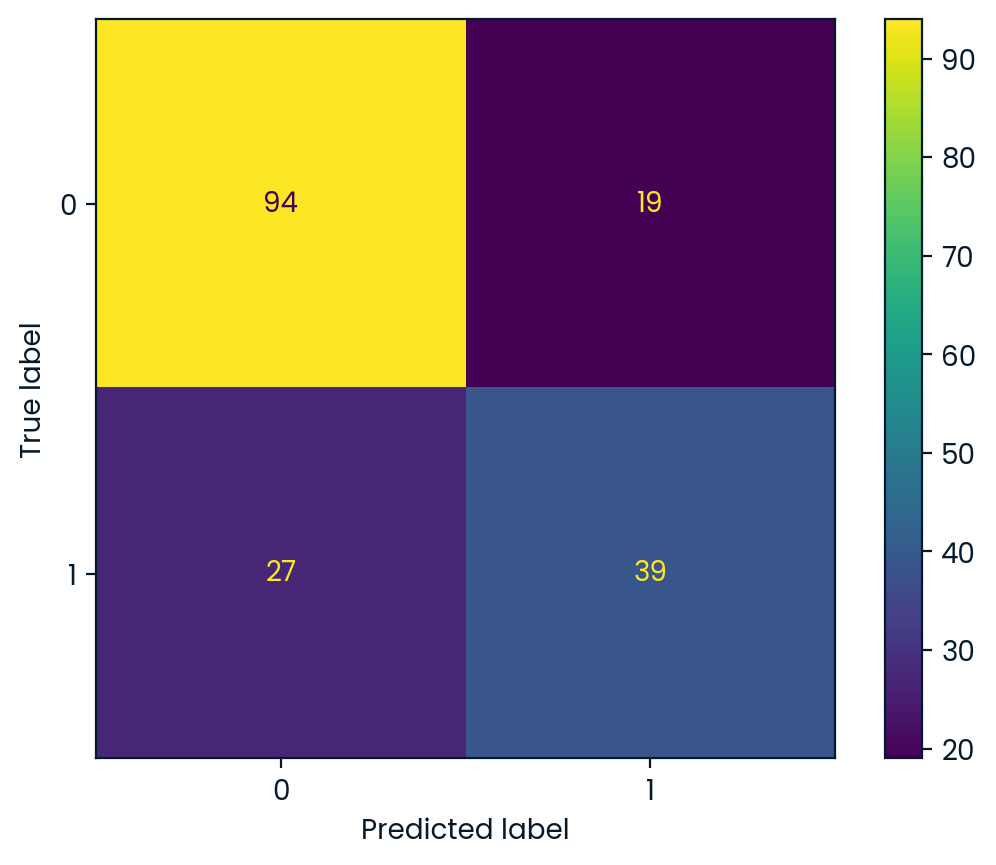

SVC Hyperparameters:
{'classifier__C': 1}
Train Accuracy:
0.7443570318570318
Test
Accuracy:0.7709
Report:              precision    recall  f1-score   support

        High       0.82      0.82      0.82       113
         Low       0.69      0.68      0.69        66

    accuracy                           0.77       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179



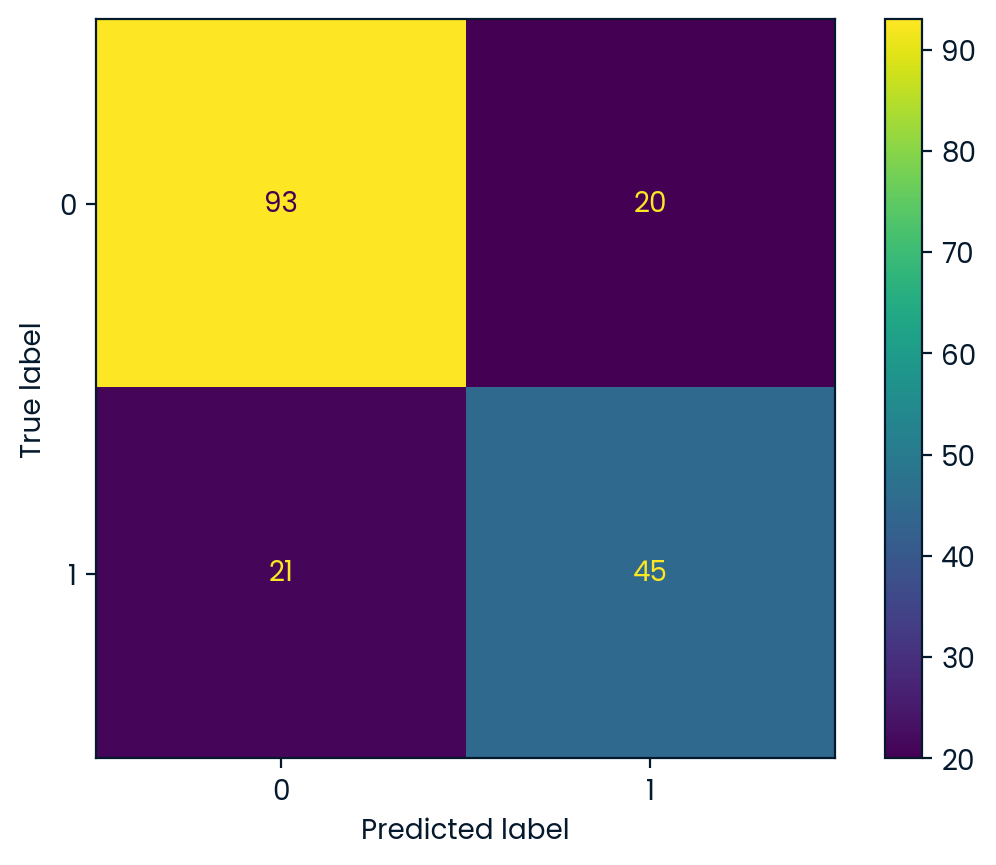

Decision Tree Classifier Hyperparameters:
{'classifier__criterion': 'gini'}
Train Accuracy:
0.6647338772338772
Test
Accuracy:0.6648
Report:              precision    recall  f1-score   support

        High       0.74      0.72      0.73       113
         Low       0.54      0.58      0.56        66

    accuracy                           0.66       179
   macro avg       0.64      0.65      0.64       179
weighted avg       0.67      0.66      0.67       179



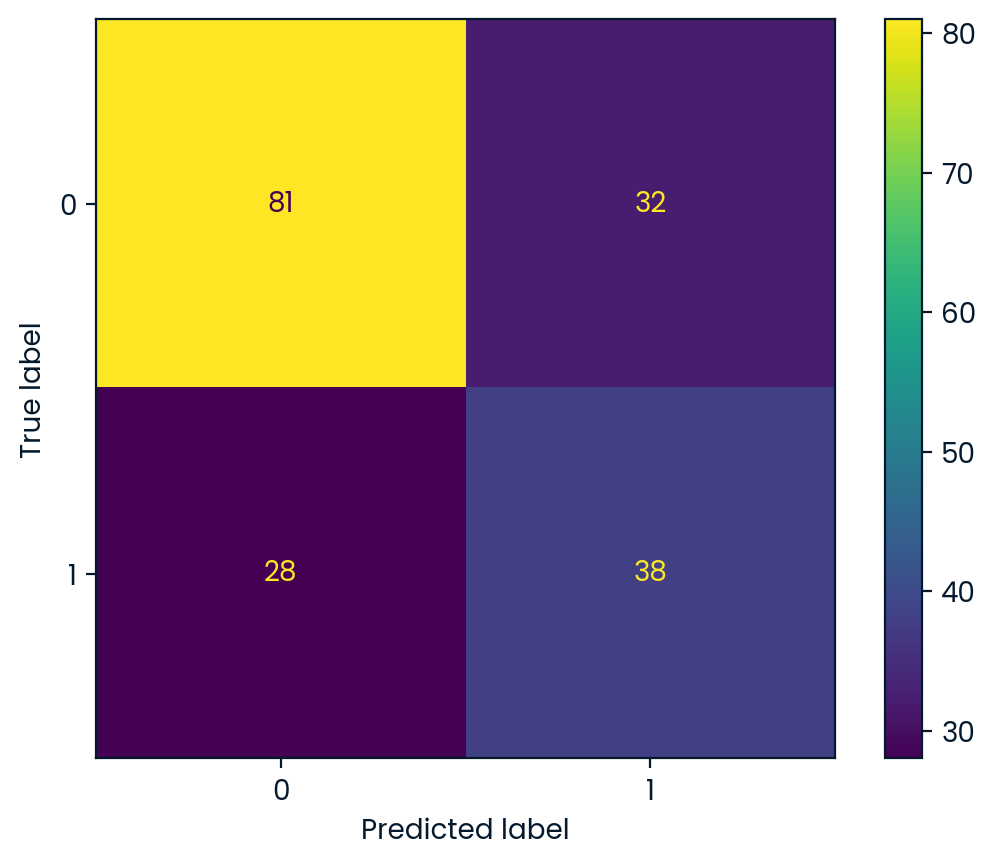

In [80]:
#Hyperparameter tuning
for clf_name,pipeline in pipe.items():
    param_grid=params_grids[clf_name]
    gridsearch=GridSearchCV(pipeline,param_grid=param_grid,cv=5,scoring='accuracy')
    #Evaluate train set
    gridsearch.fit(X_train,y_train)
    print(f'{clf_name} Hyperparameters:')
    print(gridsearch.best_params_)
    print('Train Accuracy:')
    print(gridsearch.best_score_)

    #Evaluate test set
    best_classifier = gridsearch.best_estimator_
    best_classifier.fit(X_train,y_train)
    y_pred = best_classifier.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    report = classification_report(y_test,y_pred)
    matrix = confusion_matrix(y_test,y_pred)
    print('Test')
    print(f'Accuracy:{accuracy:.4f}')
    print(f'Report:{report}')
    display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels = [0,1])
    display.plot()
    plt.show()

Analysis of Each Classifier

Logistic Regression:
Balanced Performance: It has similar accuracies on both training and test data, indicating it is neither overfitting nor underfitting significantly. It’s like studying well and performing consistently on both practice and real tests.

Random Forest Classifier:
Slight Underfitting: The training accuracy is lower than the test accuracy, suggesting it might be a bit too simple to capture all patterns in the training data. It’s like not studying enough but still performing decently on the actual test.

Support Vector Classifier (SVC):
Best Performance: The SVC has the highest test accuracy and relatively high training accuracy, indicating a good balance. It’s like studying effectively and doing the best on the actual test.

Decision Tree Classifier
Underfitting: Both training and test accuracies are quite low, suggesting the model is too simple. It’s like not studying enough and performing poorly on both practice and real tests.

Conclusion
The Support Vector Classifier (SVC) with a test accuracy of 0.7709 performs the best, striking a good balance without overfitting or underfitting significantly. This model understands the material well and performs best on both practice and real tests, indicating it generalizes well to new data.

In [81]:
#Lets take the SVC and predict a high_traffic using a sample data.
model = SVC(C=1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [82]:
#Lets take a data from train set
print(X.iloc[2,:])
print(y.loc[2])

recipe           4.000000
calories         8.416476
carbohydrate     4.091120
sugar            2.587147
protein          0.019804
servings         4.000000
Beverages        1.000000
Breakfast        0.000000
Chicken          0.000000
Dessert          0.000000
Lunch/Snacks     0.000000
Meat             0.000000
One Dish Meal    0.000000
Pork             0.000000
Potato           0.000000
Vegetable        0.000000
Name: 2, dtype: float64
High


In [83]:
pred_array = np.array([4,8.416476,4.09112,2.587147,0.019804,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000])
pred_array_reshape = pred_array.reshape(1,-1)
model.predict(pred_array_reshape)

array(['High'], dtype=object)

In the analysis of the classifiers, we observed that the output accuracy was high when the data was trained. When we used the model to predict the outcome for one of the data points, the prediction was also high, indicating that the prediction was correct.

**Summary:**

In summary, we developed and evaluated multiple models to achieve our objective. Among the models, the SVC model proved to be the most effective, achieving 77% accuracy in predicting high-traffic recipes. From a business perspective, predicting a high-traffic recipe as low traffic is a more significant error than the reverse. Therefore, our primary focus is on model precision, as incorrectly predicting low traffic for a potentially high-traffic recipe can result in substantial business losses. Through exploratory analysis, we identified specific recipe categories that consistently yield high or low traffic. Recipes categorized as "Vegetable," "Potato," or "Pork" tend to generate high traffic, making them recommended for inclusion on the website. In contrast, "Beverages" typically attract low traffic and are not recommended for featuring on the platform.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation=